# <font color='red'> Loan Approval Risk Analysis </font>

# Case Study Goals:
   * Data understanding  (10%)
   * Data Cleaning and Manipulation (20%)
   * Data analysis (40%, (Univariate and segmented univariate analysis,Business/data driven metrics, Appropriate plots)
   * Presentation and Recommendations (20%)
   * Conciseness and readability of the code (10%)   
   

#### Group members
- Saksham Gupta
- Sreehari Varma

### Assignment Brief:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.


Objective is to **identify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

#### Importing required libraries and dataset

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
loan = pd.read_csv("loan.csv", sep=",")


#### Pandas settings for larger output queue

In [2]:
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_rows', None)

> # Step 1:  Data Understanding

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan.shape

(39717, 111)

In [7]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


- As we can see that few columns are having null values, Let's understand in detail if we need to drop them.

In [8]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

#### Lets check the missing values in each column

In [10]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


> # Step 2: Data Cleaning and Manipulation

####  Many of the columns has High Null values and can be safely droped.

#### Therefore, Threshold Dropped Percentage Rate = 80%

In [11]:
Columnstobedropped = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 80]

In [12]:
print(Columnstobedropped)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [13]:
loan = loan.drop(Columnstobedropped, axis=1)
loan.shape

(39717, 55)

In [14]:
# Dropping any Duplicate Rows, if any (Keeping the First Value and dropping the rest)
loan.drop_duplicates(keep = 'first', inplace = True)


In [15]:
#Let's check again for missing values and their percentage column wise
round(loan.isnull().sum()/len(loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

- There are till two columns with lots of null values
- mths_since_last_delinq with 65% and desc 33%. So let's drop them as well.

In [16]:
Columnstobedropped = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 20]
print(Columnstobedropped)

Index(['desc', 'mths_since_last_delinq'], dtype='object')


In [17]:
#Lets now check each column values and meaning from description file to see what else can be removed
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.
<br> Let's use this file to get a better understanding of the 55 columns we are left with.
<br> This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default.
Some other columns are redundant.


In [18]:
columns_tobe_dropped = ['id','member_id','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','tax_liens','title', 'total_rec_prncp',
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                    'last_pymnt_amnt', 'revol_bal','collections_12_mths_ex_med','chargeoff_within_12_mths']
loan= loan.drop(columns_tobe_dropped,axis=1)

In [19]:
#Now we are left with just 33 columns for analysis
loan.shape

(39717, 33)

In [20]:
loan.describe()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,22.088828,51.227887,50.989768,12153.596544,11567.149118,0.043260
std,7456.670694,7187.238670,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,11.401709,375.172839,373.824457,9042.040766,8942.672613,0.204324
min,500.000000,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,0.000000
50%,10000.000000,9600.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,0.000000
75%,15000.000000,15000.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,0.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,2.000000


In [21]:
#Let us segrigate date columns and format them uniformily
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_colmns].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             39717 non-null  object
 1   earliest_cr_line    39717 non-null  object
 2   last_pymnt_d        39646 non-null  object
 3   last_credit_pull_d  39715 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [22]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [23]:
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             39717 non-null  datetime64[ns]
 1   earliest_cr_line    39717 non-null  datetime64[ns]
 2   last_pymnt_d        39646 non-null  datetime64[ns]
 3   last_credit_pull_d  39715 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.5 MB


In [24]:
#Lets convert the int_rate, revol_util columns by removing the percentage signs and convert from type:object to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [25]:
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')
loan['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

#### Let us now take a look at the __emp_length__ column.

According to the data_dictionary file description for this field,<br>
* emp_length  : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
<br> Let's convert the column to have values between 0 and 10.

In [26]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [27]:
loan = loan.replace({"emp_length": emp_length_dict })

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64




[]

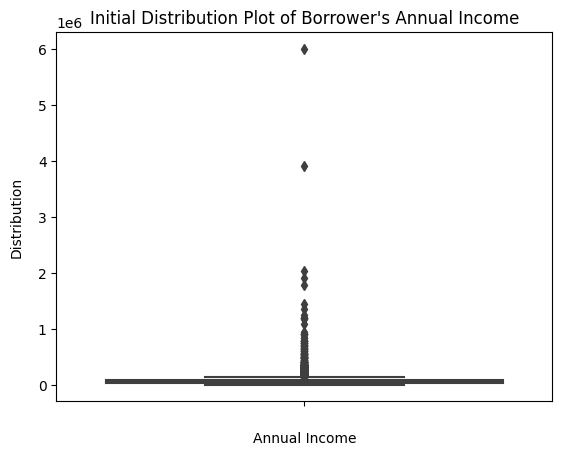

In [28]:
# Removing Outliers

# Column = annual_inc

print(loan.annual_inc.describe())
print('\n')

plt.title("Initial Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = loan)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

In [31]:
# We can observe there is lot of outliers in the annual_income and it is very clustered.
print("skew: ", loan['annual_inc'].skew(),"\n")
print(loan['annual_inc'].describe(),"\n")

#IQR to understand outliers
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)


skew:  30.949184600959956 

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 

IQR:  loan_amnt                  9500.00000
funded_amnt                9600.00000
int_rate                      5.34000
installment                 263.76000
emp_length                    7.00000
annual_inc                41896.00000
dti                          10.43000
delinq_2yrs                   0.00000
inq_last_6mths                1.00000
mths_since_last_delinq       34.00000
open_acc                      6.00000
pub_rec                       0.00000
revol_util                   47.00000
total_acc                    16.00000
out_prncp                     0.00000
out_prncp_inv                 0.00000
total_pymnt               10957.50304
total_pymnt_inv           10686.50000
pub_rec_bankruptcies          0.00000
dtype: float64


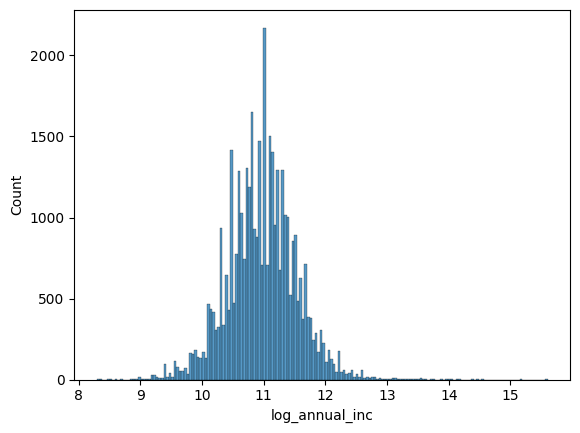

In [34]:
# We Obserev very high skewness in this data.  Let us apply various aproch to see if can format this data for our requirement
## 1. Log Transformation
df_temp = pd.DataFrame()
df_temp['log_annual_inc'] = loan["annual_inc"].map(lambda i: np.log(i) if i > 0 else 0)
sns.histplot(x=df_temp["log_annual_inc"])
plt.show()

###Log Transformation doesnot fit our requirement as we need to take in consideration of the max values as well when comparing with defaulters. As you can see the median is accumulated with count distorting our data

(Floor quantile, Cap quantile):  30000.0 , 116000.0
0.44220410997455656


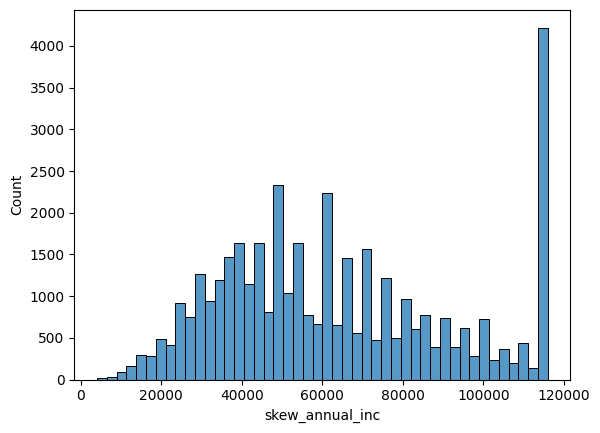

In [37]:
# 2. Quantile based capping
floor_quantile=loan['annual_inc'].quantile(0.10)
cap_quantile=loan['annual_inc'].quantile(0.90)
print ("(Floor quantile, Cap quantile): ",floor_quantile, ",", cap_quantile)

df_temp["skew_annual_inc"] = np.where(loan["annual_inc"] <floor_quantile, floor_quantile,loan['annual_inc'])
df_temp["skew_annual_inc"] = np.where(loan["annual_inc"] >cap_quantile, cap_quantile,loan['annual_inc'])
print(df_temp['skew_annual_inc'].skew())
#Now we have much better skewness
sns.histplot(x=df_temp["skew_annual_inc"])
plt.show()

### The above grapgh makes more sense for our analysis, as it clearly suggests that there is larger individuals with annual_inc > 120K .

Quantile Value = 234999.36


count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64




[]

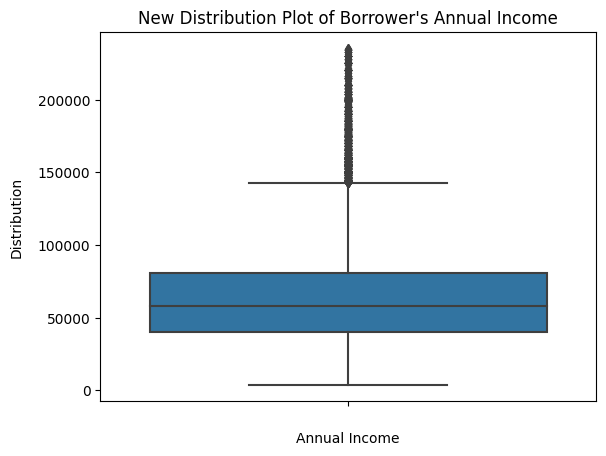

In [38]:
# Let us take just the max quantile for now disregarding all outliers
qnt = loan.annual_inc.quantile(0.99)

print('Quantile Value =', qnt)
print('\n')

loan = loan[loan.annual_inc < qnt]

print(loan.annual_inc.describe())
print('\n')

plt.title("New Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = loan)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

The above graph shows that there is a high amount outlier present. Maximum value is 87 times higher than Mean
and 102 times high than Median. Considering a Hit and Trial Run, it is found that the outliers lies above 99th
percentiles. So dropping those outliers.

In [39]:
# Final DataFrame Shape (Observations, Variables)
loan.shape

(39319, 33)

Comparing intial Dataframe to final Dataframe , we have
        
        Number of Rows dropped = 39717 - 39319 = 398
        
        Number of Columns dropped = 111 - 34 = 77

In [40]:
# Data Glimpse
loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'last_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [41]:
# Deriving new metric "issue_yr" from existing variable "issue_d"
loan['issue_yr'] = pd.to_datetime(loan['issue_d'], format = '%b-%y').dt.year

# Data Glimpse
loan.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_yr
0,5000,5000,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,...,83.7,9,0.00,0.00,5863.155187,5833.84,2015-01-01,2016-05-01,0.0,2011
1,2500,2500,60 months,15.27,59.83,C,C4,Ryder,0.0,RENT,...,9.4,4,0.00,0.00,1008.710000,1008.71,2013-04-01,2013-09-01,0.0,2011
2,2400,2400,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,...,98.5,10,0.00,0.00,3005.666844,3005.67,2014-06-01,2016-05-01,0.0,2011
3,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,...,21.0,37,0.00,0.00,12231.890000,12231.89,2015-01-01,2016-04-01,0.0,2011
4,3000,3000,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,...,53.9,38,524.06,524.06,3513.330000,3513.33,2016-05-01,2016-05-01,0.0,2011


> # Step 3 - Data Analysis

In [42]:
master_loan = loan[:]

In [43]:
master_loan.shape

(39319, 34)

In [44]:
master_loan.loan_status.value_counts()

Fully Paid     32609
Charged Off     5584
Current         1126
Name: loan_status, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [45]:
master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
master_loan.shape

(38193, 34)

# Univariate and Segmented Univariate Analysis

In [46]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks()
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)

        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [47]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value.
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [48]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(17,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [49]:
# This method prints two plots side by side
# Left one is percentage of a categorical variable in the entire dataset
# Right one is percentage for Charged Off loans
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

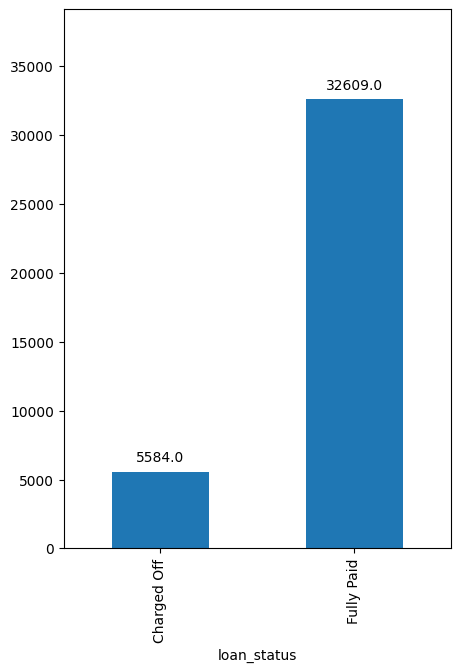

In [50]:
plt.figure(figsize=(5,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax,d=None)
plt.show()

In [51]:
print("%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan)))

14.62


Approximately 15% of loans in the dataset are defaulted.
Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.97 - a large enough increase)

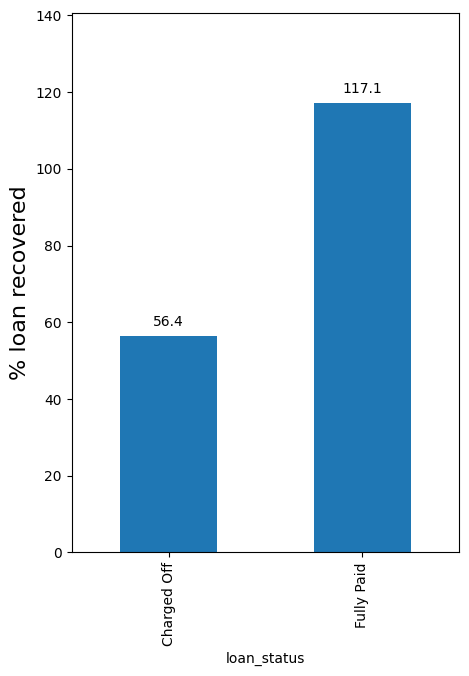

In [52]:
plt.figure(figsize=(5,7))
ax = (master_loan.groupby('loan_status').total_pymnt.sum() * 100 / master_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

<mark>Lending Club only recovers 56.4% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit. </mark>

### Let us see graphs of some other important variables

#### Variable: loan_amnt
Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

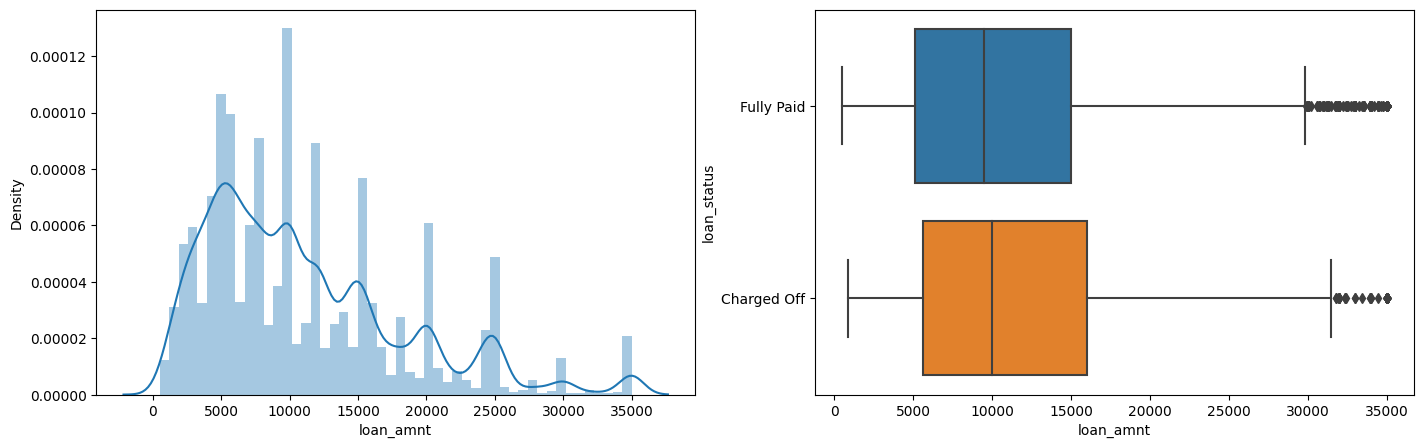

In [53]:
plot_distribution(master_loan, 'loan_amnt')

In [ ]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5584.0,12042.814291,8041.184317,900.0,5600.0,10000.0,16000.0,35000.0
Fully Paid,32609.0,10777.402711,7108.652953,500.0,5100.0,9500.0,15000.0,35000.0


**Observation:**
-  Overall, the applied loan amount distribution is slightly __right-skewed__ with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
- Funding amounts see a spike around each 5000 boundary. <mark>We will use 5000 as bucket size for later analysis.</mark>
- Charged off loans are shifted towards higher average loan amount request.

In [54]:
#Create Derived categorical variable
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'],
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

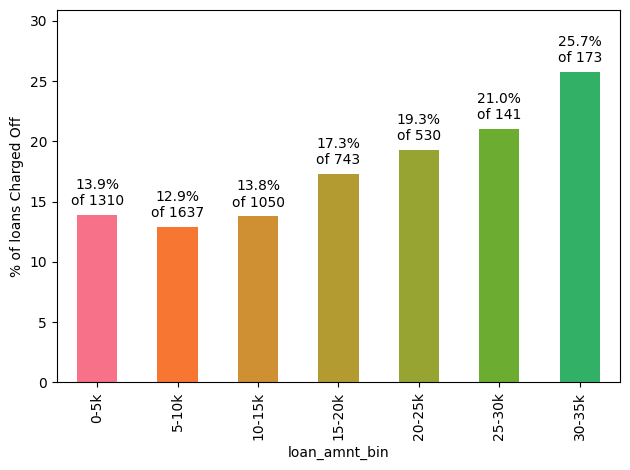

In [55]:
plotLoanStatus(master_loan, 'loan_amnt_bin')

**Observation:**
- The percentage of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

---
#### Other categorical variables distribution
Let's see how some other categorical variables of interest are distributed within the dataset

In [56]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

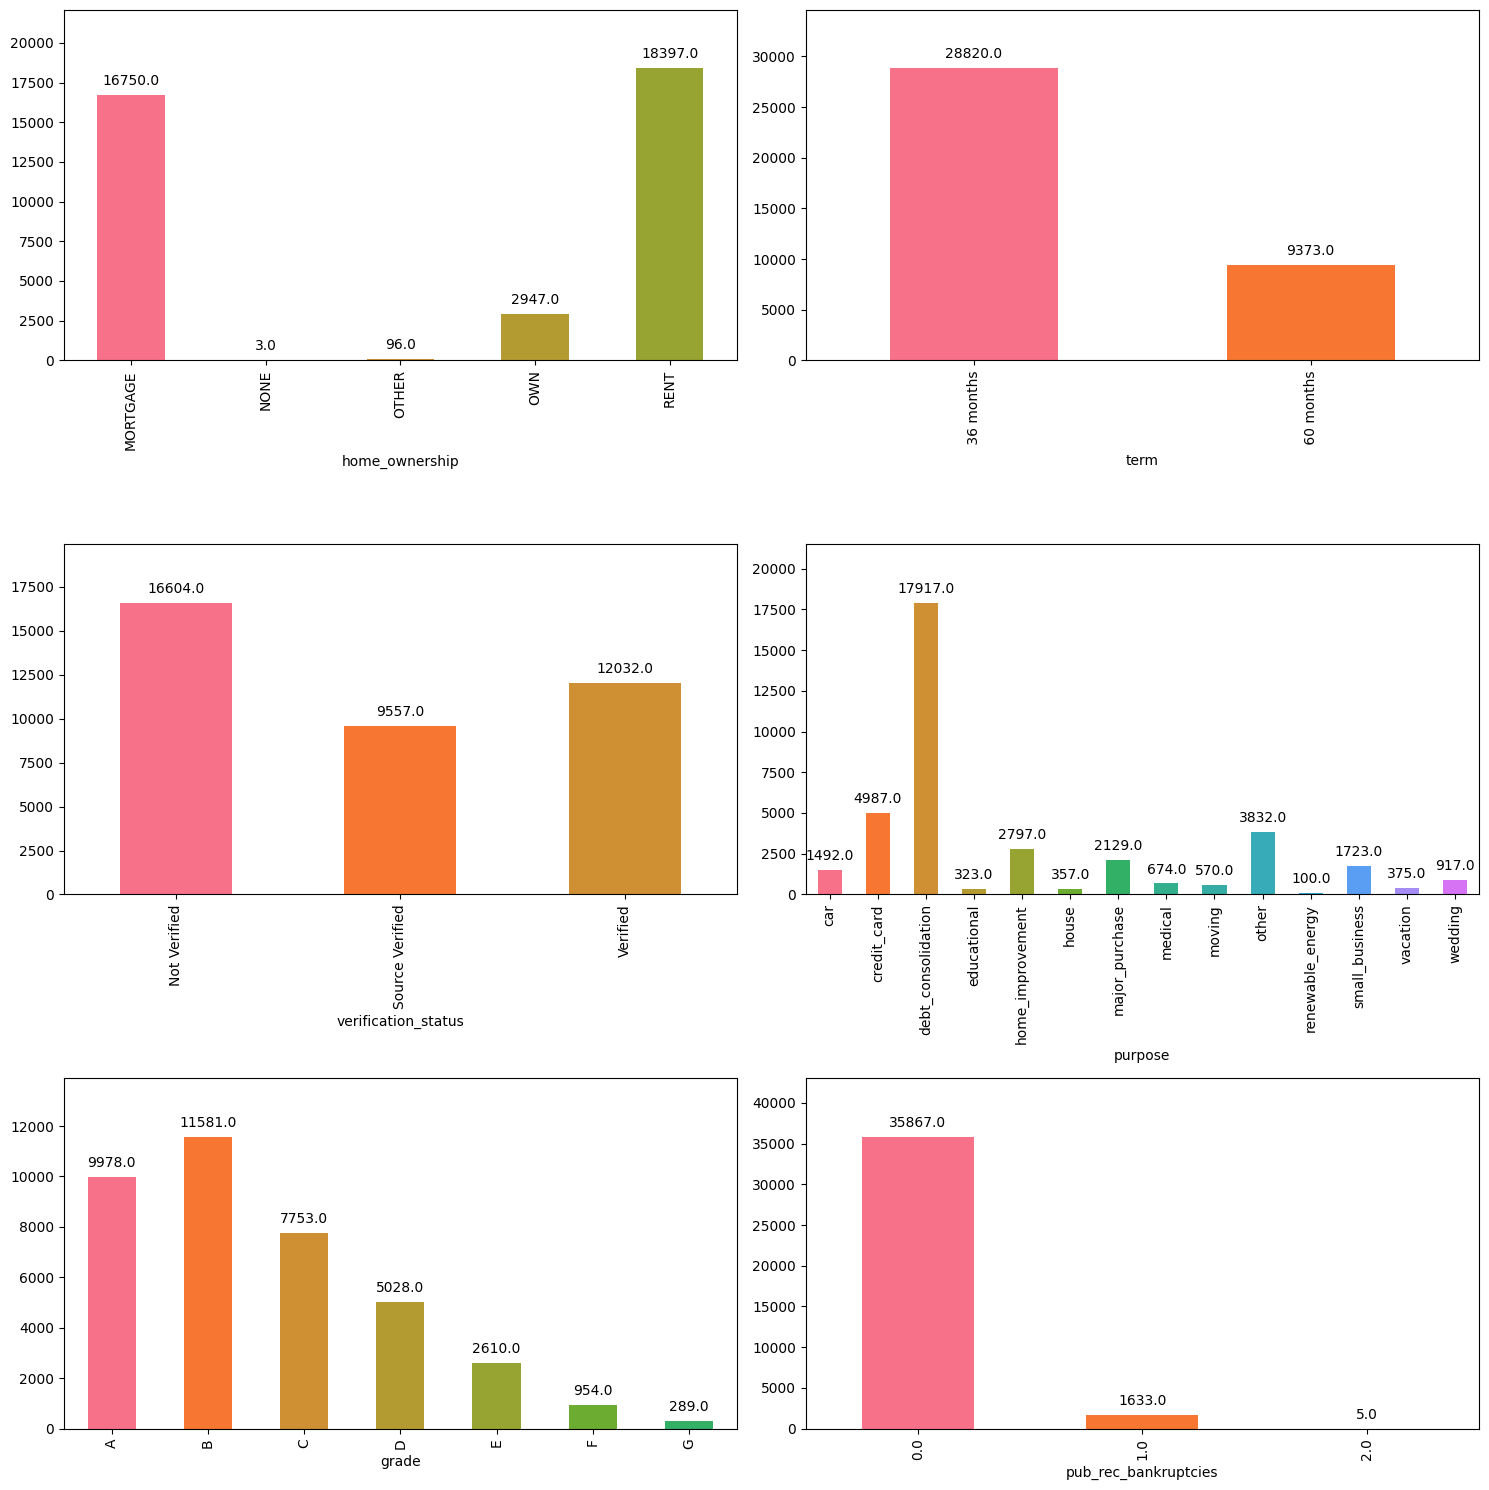

In [57]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Obervation**
* Most loans are for 36 month term
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan
* Most approved loans are high grade
* <mark> We should investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy </mark>

---
#### Variable: term
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

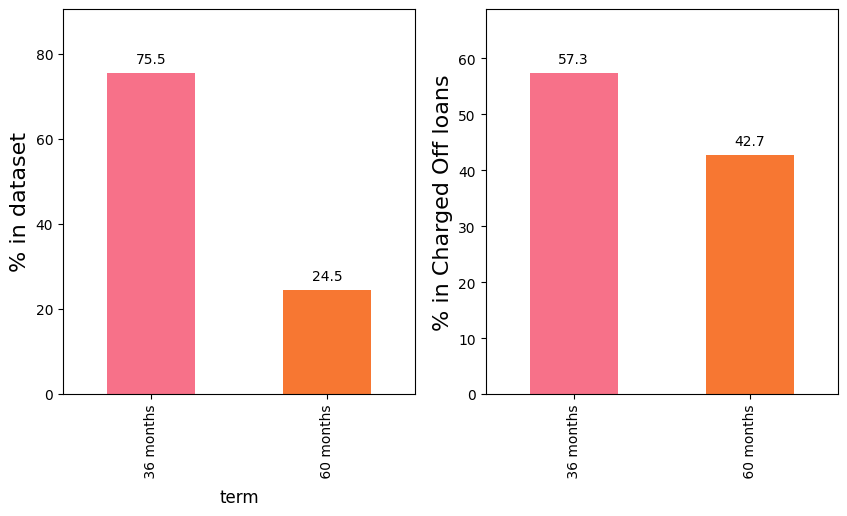

In [58]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term')

**Observation:**
-  Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
-  Among Charged Off loans, percentage of term 60 months rises to 42.7%. <mark>The higher term loans have a higher chance of default.</mark>  

---
#### Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

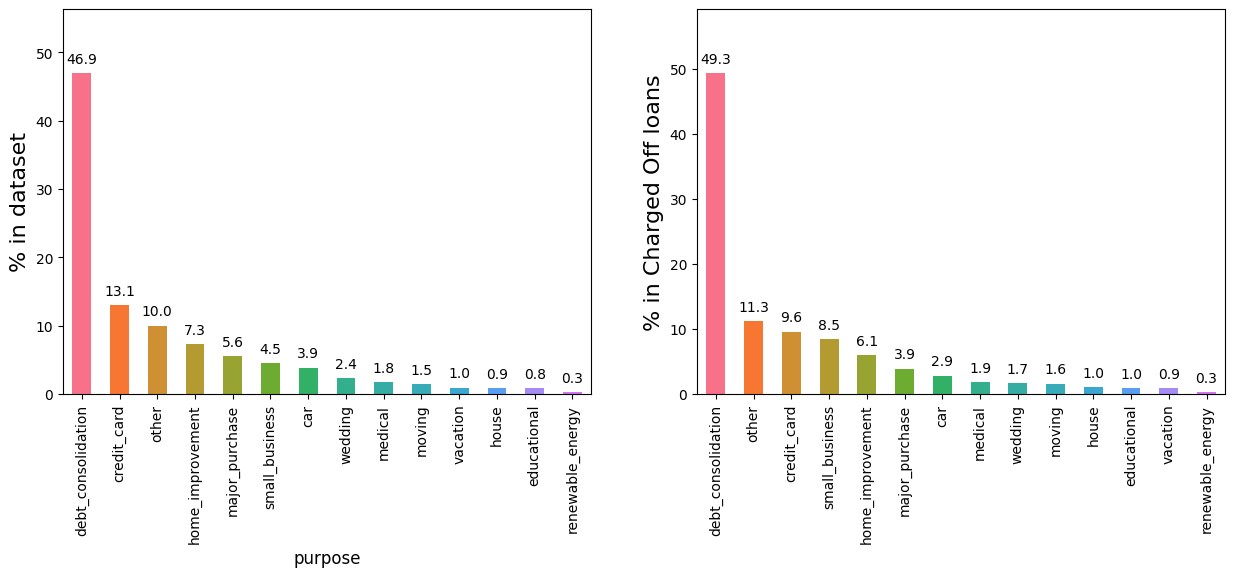

In [59]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'purpose')

**Observation:**
-  <mark>The category 'small_business' percentage **doubles from 4.5 to 8.5** for Charged Off loans.</mark> Let's see how the categories of this variable behave.

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

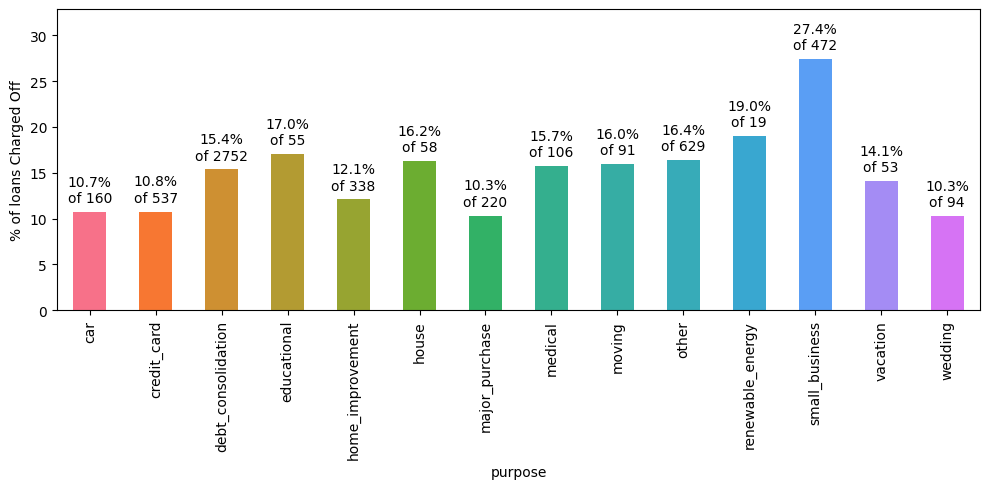

In [60]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

---
#### Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

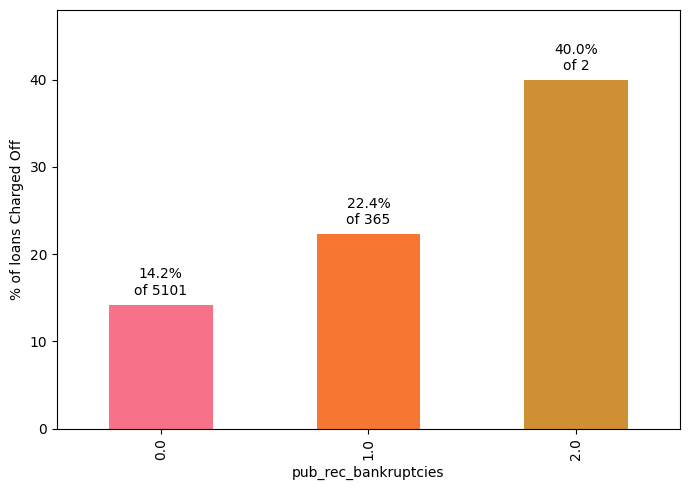

In [61]:
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

**Observation:**
-  <mark>The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.</mark>

---
#### Variable: int_rate
Data_Dictionary: Interest Rate on the loan.

In [62]:
master_loan.int_rate.describe()

count    38193.000000
mean        11.917852
std          3.684104
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1500x500 with 0 Axes>

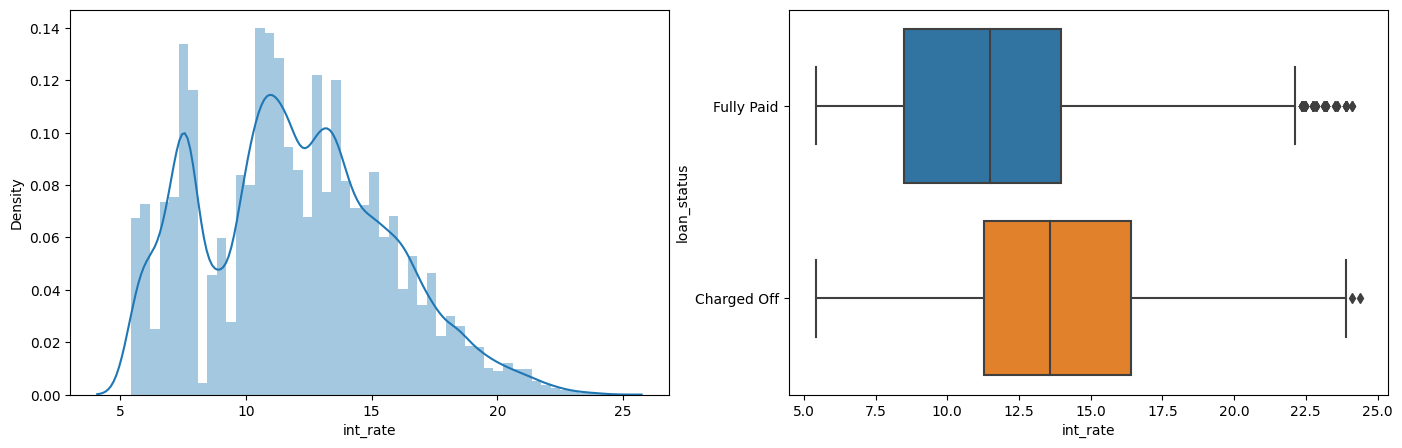

In [63]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'int_rate')

In [64]:
master_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5584.0,13.808626,3.648676,5.42,11.28,13.57,16.40,24.40
Fully Paid,32609.0,11.594074,3.591723,5.42,8.49,11.49,13.98,24.11


**Observation:**
-  Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
-  The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more -

In [65]:
master_loan['interest_rate_buckets'] = round(master_loan['int_rate'])

<Axes: xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

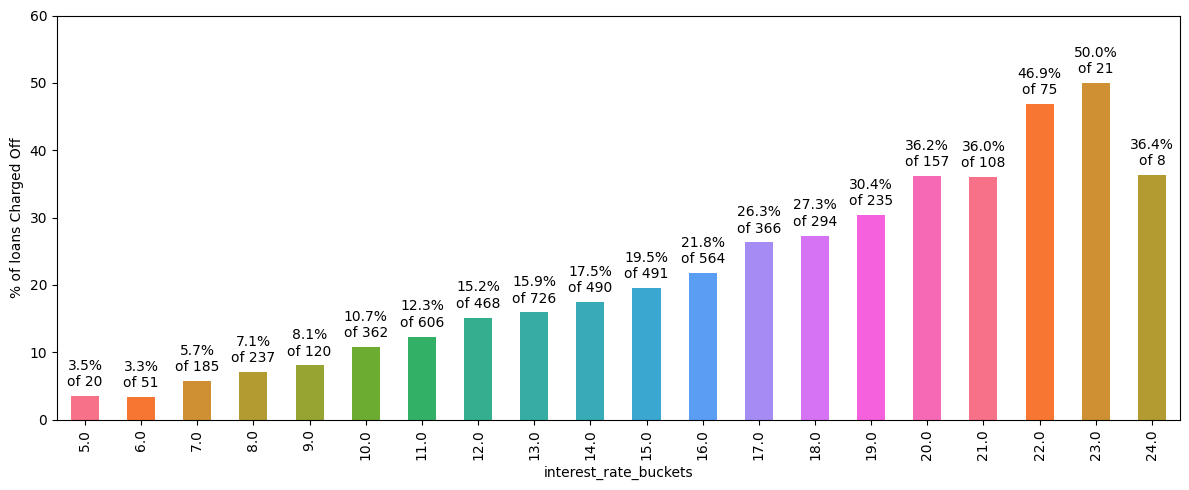

In [66]:
plt.figure(figsize=(12,5))
plotLoanStatus(master_loan, 'interest_rate_buckets')


---
#### Variable: installment
Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [67]:
master_loan.installment.describe()

count    38193.000000
mean       319.935974
std        205.943424
min         15.690000
25%        165.380000
50%        276.300000
75%        421.800000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1500x500 with 0 Axes>

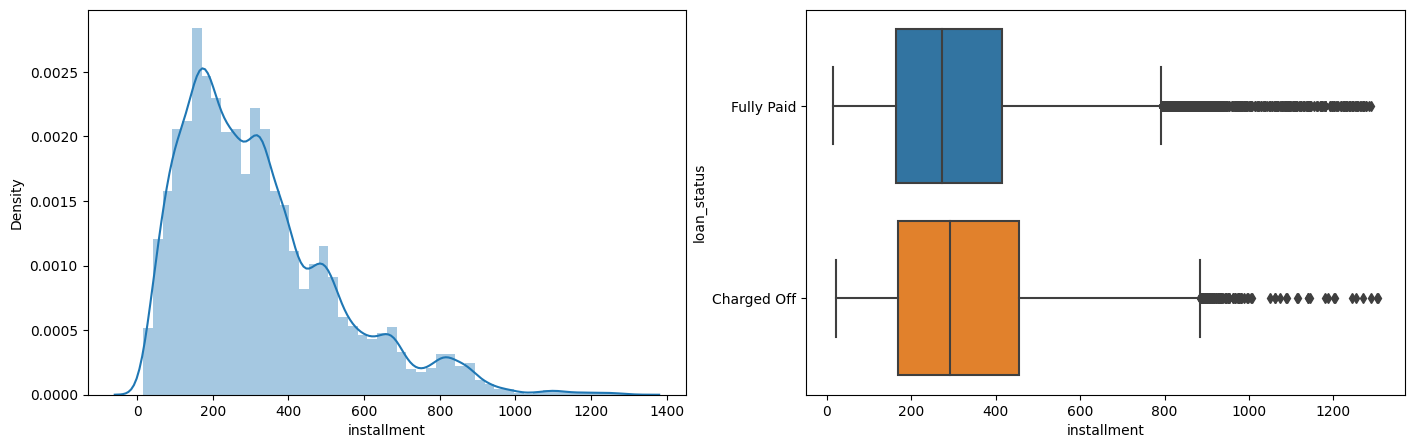

In [68]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

In [69]:
master_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5584.0,334.277242,215.309759,22.79,168.45,292.035,454.375,1305.19
Fully Paid,32609.0,317.480160,204.198909,15.69,164.85,273.760,415.920,1288.10


**Observation:**
-  installment amount varies largely between 167 to 430 with median of 280
-  loans Charged Off have high installment on average

---
#### Variable: grade and sub_grade
Data_Dictionary: LC assigned loan grade and subgrade.

In [70]:
master_loan.grade.value_counts()

B    11581
A     9978
C     7753
D     5028
E     2610
F      954
G      289
Name: grade, dtype: int64

Let's find the relative frequencies of the unique sub_grade.`

In [71]:
master_loan.sub_grade.value_counts(normalize=True).head()

A4    0.074726
B3    0.073102
A5    0.070536
B5    0.068075
B4    0.063493
Name: sub_grade, dtype: float64

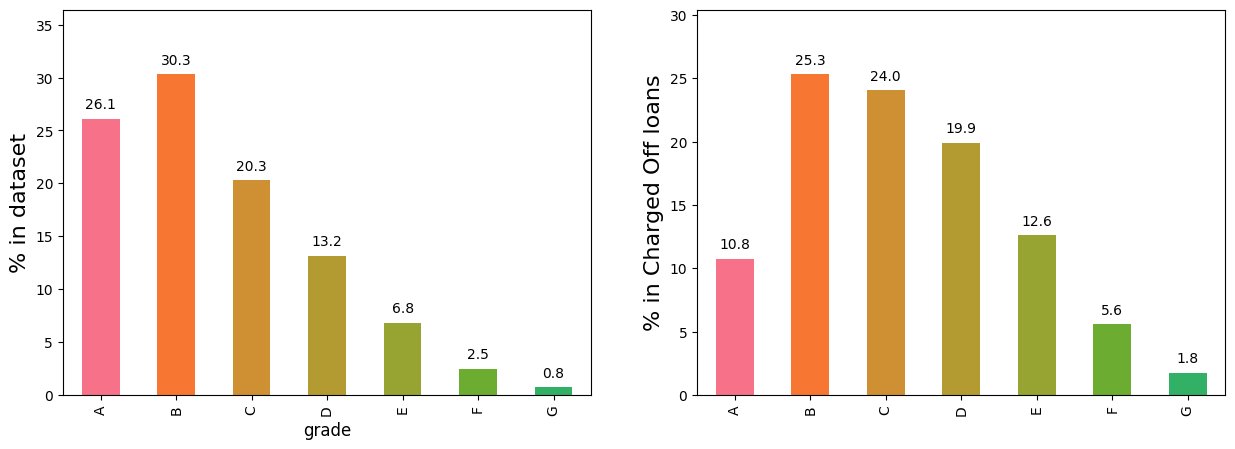

In [73]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade', True)

**Observation:**
-  Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
- Grade D, E, F, G loans are less safe. <mark>We should plot grade by percentage Charged Off by category</mark>
- Lending Clubs grading system is working well.

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

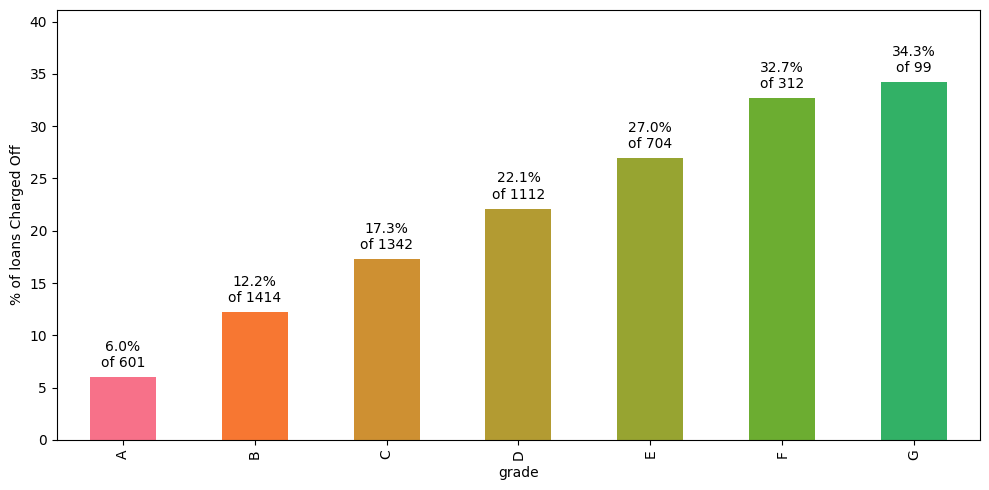

In [80]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'grade')

**Observation:**
- Nearly 33% of all loans in Grades F and G see a default.
- Grade E onwards are risky, and less numerous. <mark>Lending Club should either refuse loans or charge high interest rates.</mark>

---
#### Variable - home_ownership
Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

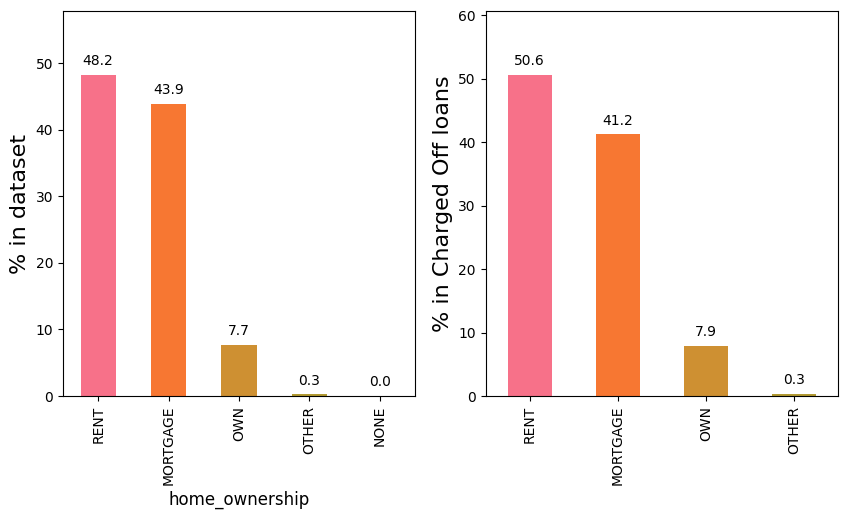

In [81]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'home_ownership')

**Observation:**
- <mark>There is no impact of home_ownership to propensity to default on loan.</mark>


#### Variable - annual_inc
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [82]:
master_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count     38193.000000
mean      65322.485244
std       35171.242586
min        4000.000000
10%       30000.000000
25%       40000.000000
50%       58000.000000
75%       80263.000000
90%      111000.000000
max      234996.000000
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc'>

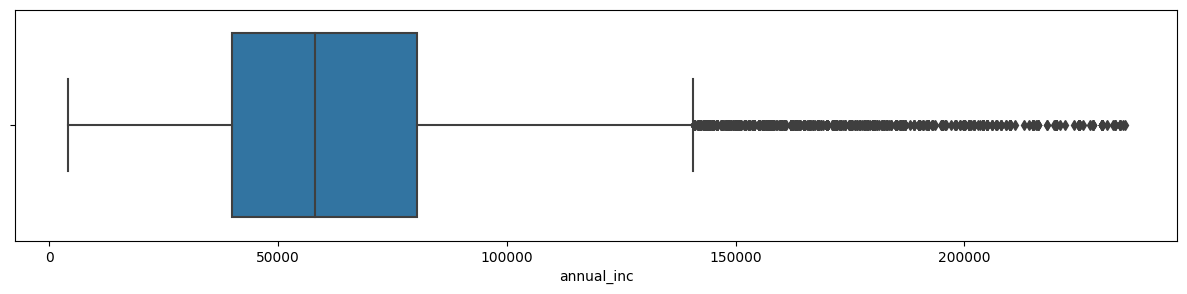

In [83]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=master_loan['annual_inc'], data=master_loan)

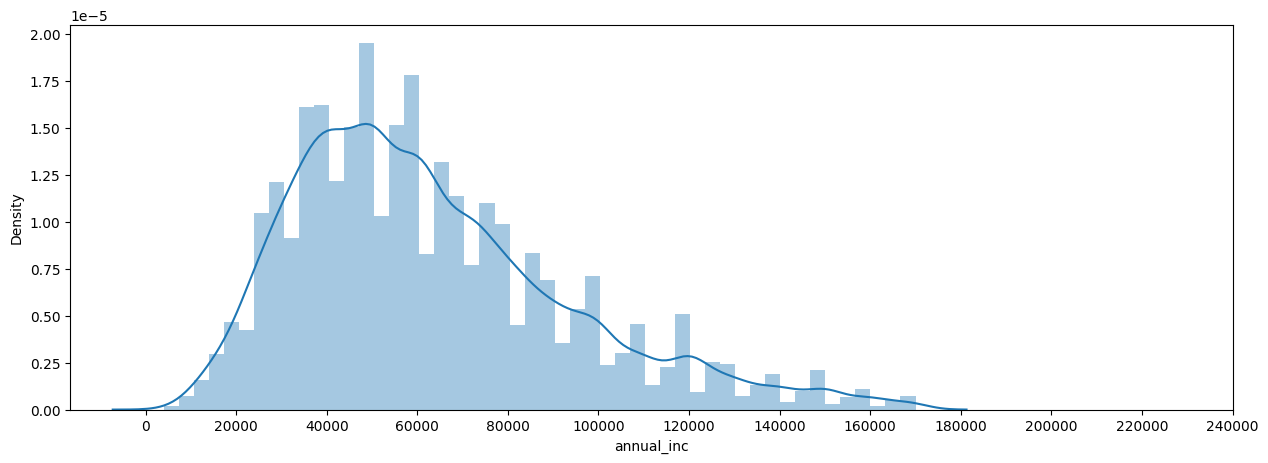

In [84]:
# Let's get rid of outliers to analyze annual income.
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = master_loan[np.abs(master_loan.annual_inc-master_loan.annual_inc.mean()) <= (3*master_loan.annual_inc.std())]
df.annual_inc.describe()
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

The annual income reprted by the borrowers range from min of 4,000 to max of 234996

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k')]

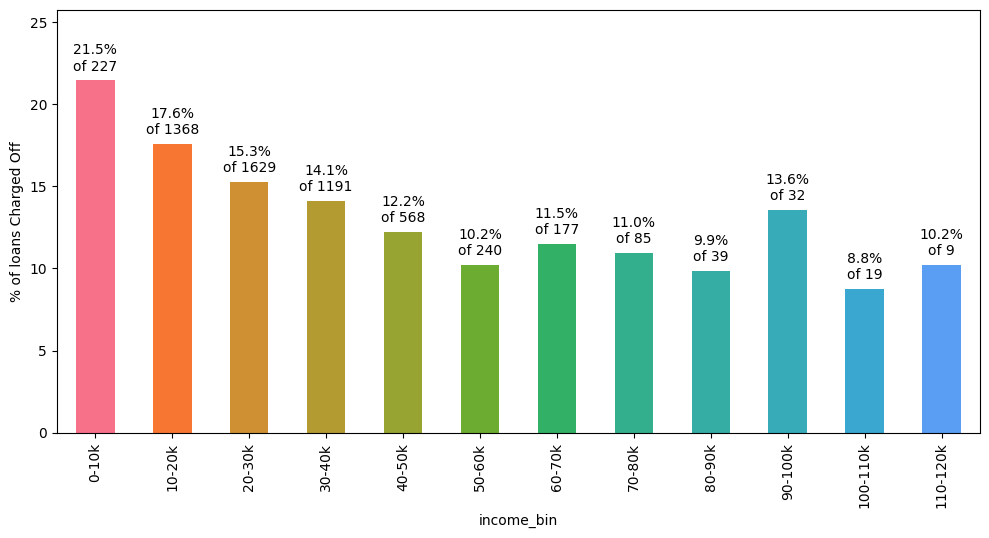

In [85]:
#Create Derived categorical variable
master_loan['income_bin'] = master_loan['annual_inc']/20000
#master_loan['income_bin'] = pd.cut(master_loan['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
master_loan['income_bin'] = master_loan['income_bin'].astype(int)
plt.figure(figsize=(10,5))
ax = plotLoanStatus(master_loan.loc[master_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

**Observation:**
- <mark>Loan defaults are higher for lower income, and progressively reduce as incomes go up.</mark>
- It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

---
#### Variable - verification_status
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

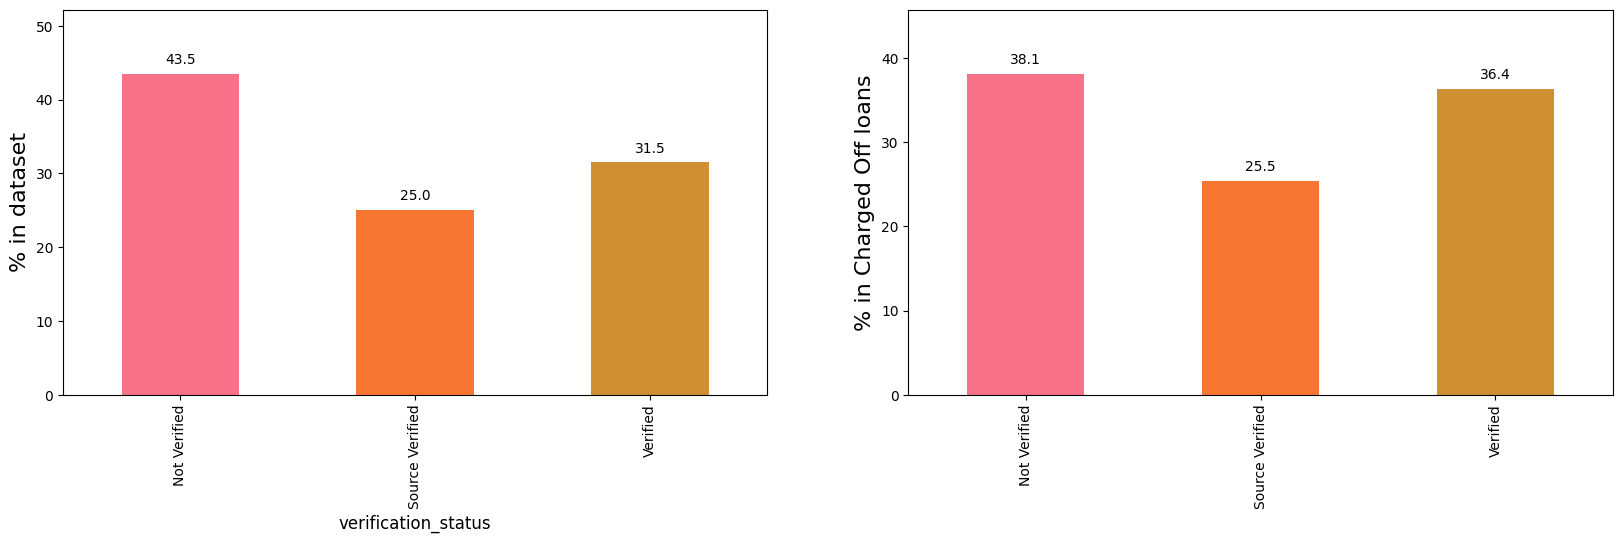

In [86]:
plt.figure(figsize=(20,5))
plot_percentages(master_loan, 'verification_status', True)

**Observation:**
-  Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
-  <mark>Verified loans show more charged Off percentage as compared to Not verified loans.</mark> This is unexpected and will be investigated later in bivariate analysis

---
#### Variable - addr_state
Data_Dictionary: The state provided by the borrower in the loan application

In [87]:
master_loan.addr_state.value_counts(normalize=True).head(10)

CA    0.180216
NY    0.095410
FL    0.071977
TX    0.068808
NJ    0.046265
PA    0.038201
IL    0.038175
VA    0.035556
GA    0.035347
MA    0.033488
Name: addr_state, dtype: float64

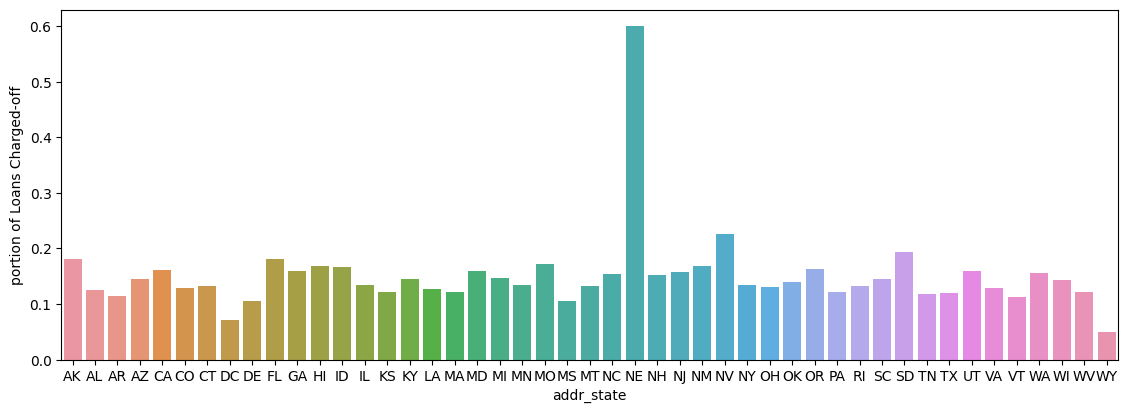

In [92]:
# plt.figure(figsize=(30,5))
# plt.subplot(1, 2, 1)
# sns.countplot(master_loan['addr_state'], order=sorted(master_loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
Fully_paid_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
#b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
#b.set_ylabel('portion of Loans Fully Paid')
plt.show()


**Observation:**
- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.


---
#### Variable - dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

<Figure size 1000x500 with 0 Axes>

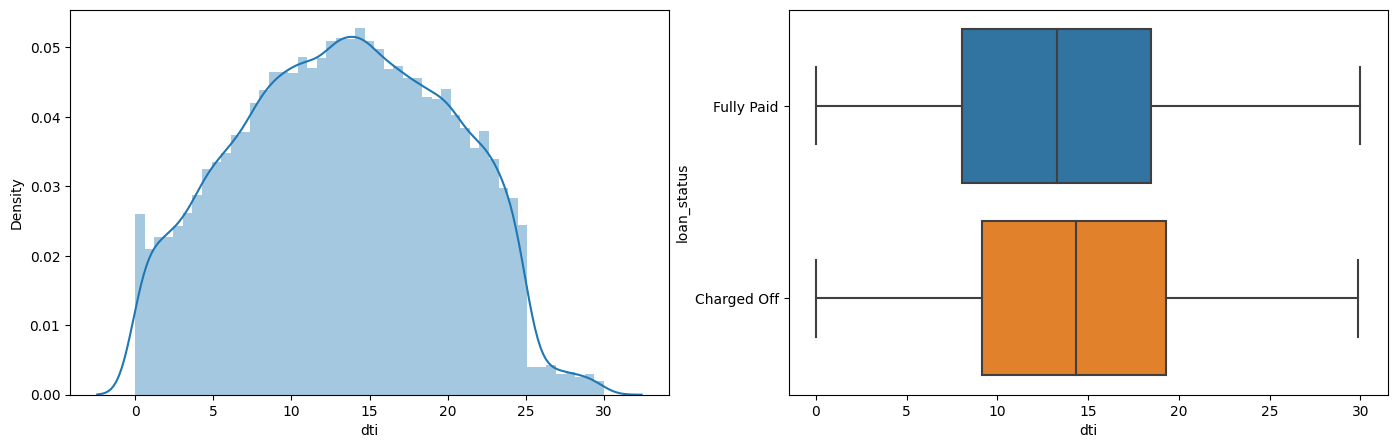

In [93]:
plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'dti')

In [94]:
# Create derived variable
master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


<Axes: xlabel='dti_bin', ylabel='% of loans Charged Off'>

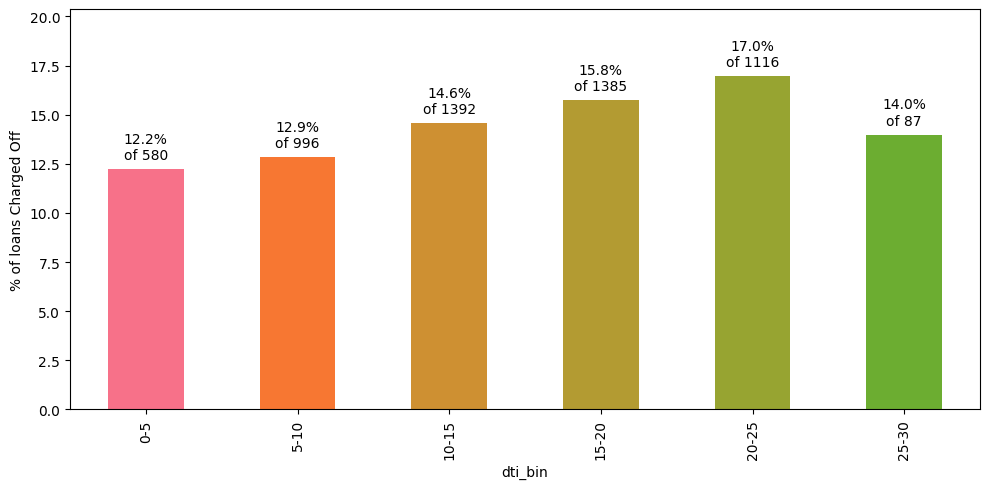

In [95]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'dti_bin')

**Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

---
#### Variable - delinq_2yrs
Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [96]:
master_loan.delinq_2yrs.value_counts(normalize=True)

0     0.892022
1     0.082764
2     0.017228
3     0.005446
4     0.001519
5     0.000550
6     0.000262
7     0.000105
8     0.000052
9     0.000026
11    0.000026
Name: delinq_2yrs, dtype: float64

<Axes: xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

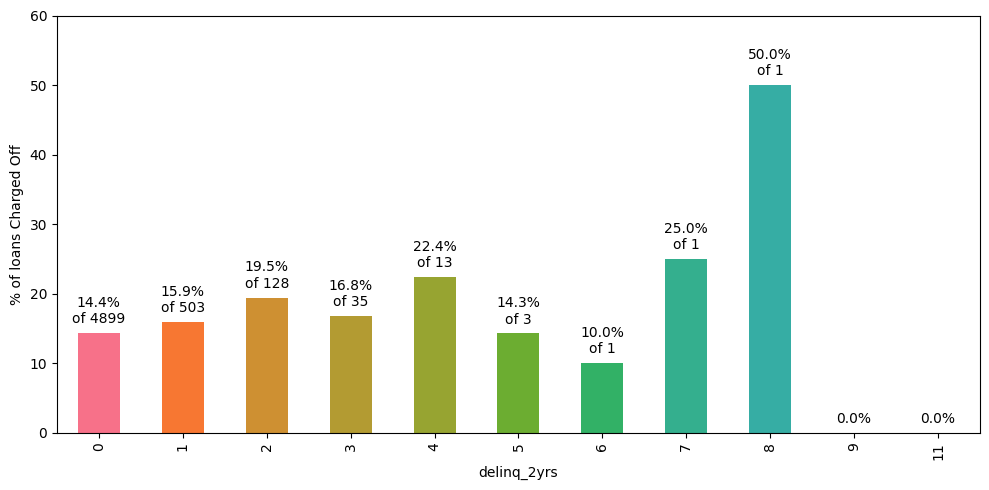

In [97]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'delinq_2yrs')

**Observation:**
-  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances (above ~20%) of default if this variable is greater than 1.


---
#### Variable - last_pymnt_d
Data_Dictionary: Last month payment was received.

In [98]:
master_loan['last_pymnt_d_month']= master_loan['last_pymnt_d'].dt.month
master_loan['last_pymnt_d_year']= master_loan['last_pymnt_d'].dt.year

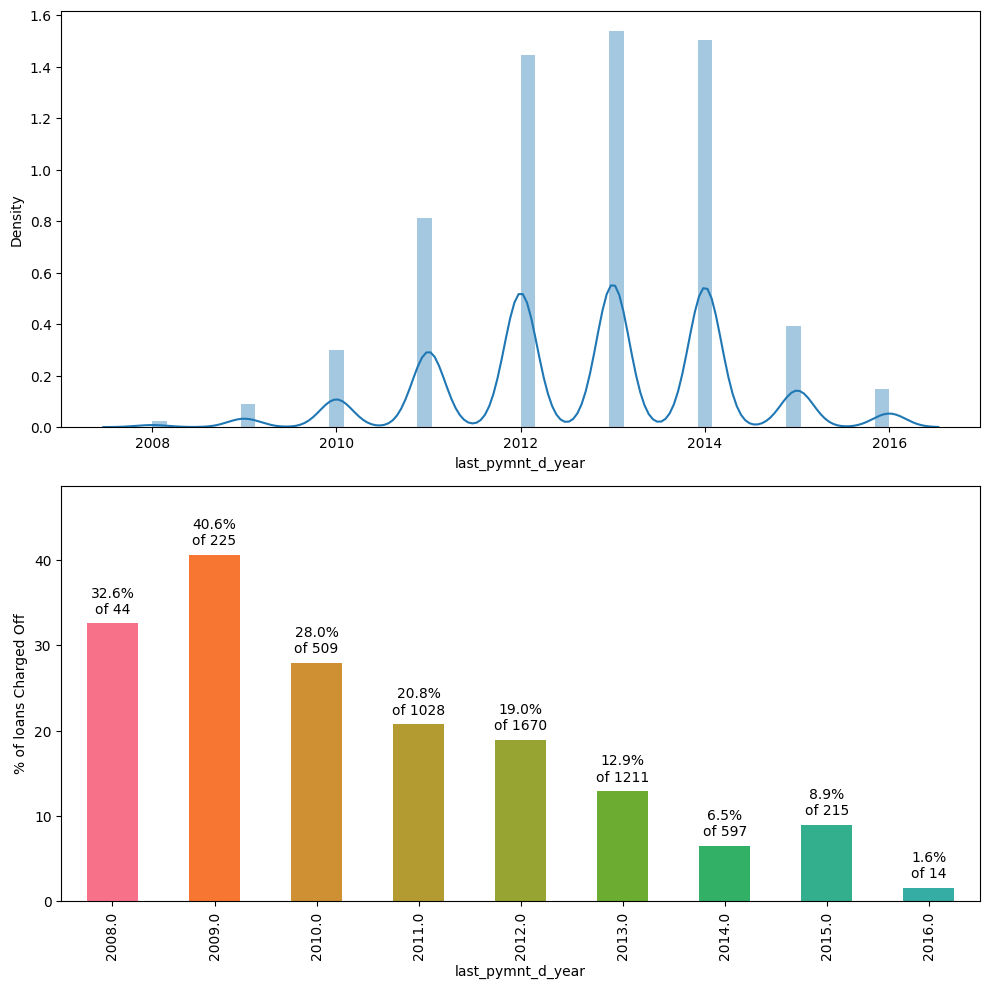

In [99]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(master_loan['last_pymnt_d_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(master_loan['earliest_cr_line_month'], order=sorted(master_loan.issue_d_month.unique()))
#plt.show()

plt.subplot(2, 1, 2)
plotLoanStatus(master_loan, 'last_pymnt_d_year')
plt.show()


**Observation:**
-  Overall, around 75% of the last payment dates are during 2012-2014 period.
-  40.6% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis.
- This variable does not affect analysis and will be ignored.

---
#### Derived variable - ratio of loan amount to annual income

<Axes: xlabel='ratio', ylabel='Density'>

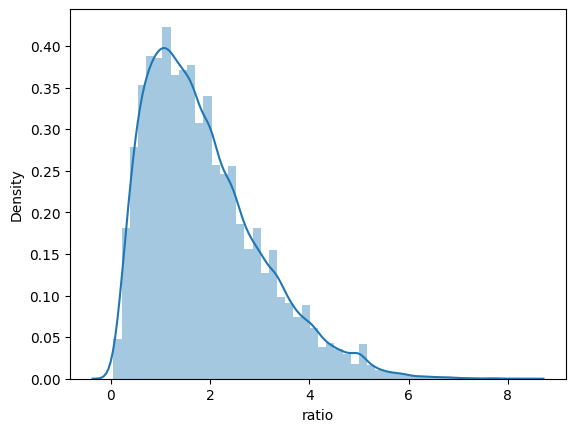

In [100]:
master_loan['ratio'] = master_loan['loan_amnt'] * 10 / master_loan['annual_inc']
sns.distplot(master_loan['ratio'])

<Axes: xlabel='ratio_bin', ylabel='% of loans Charged Off'>

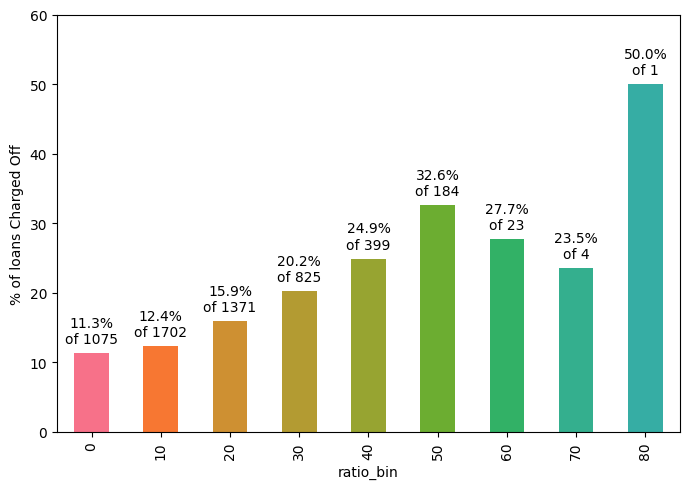

In [101]:
master_loan['ratio_bin'] = (master_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'ratio_bin')

**Observation:**
-  As long as loan amount is less than 20% of annual income, defaults are low.
- <mark>Loan amounts of 30% of annual income or higher see a high rate of default.</mark>

> ## Bivariate Analysis

---
###  loan_amnt and annual_inc

In [113]:
df_temp = pd.DataFrame()
df_temp=master_loan.loc[master_loan['annual_inc']<260000]

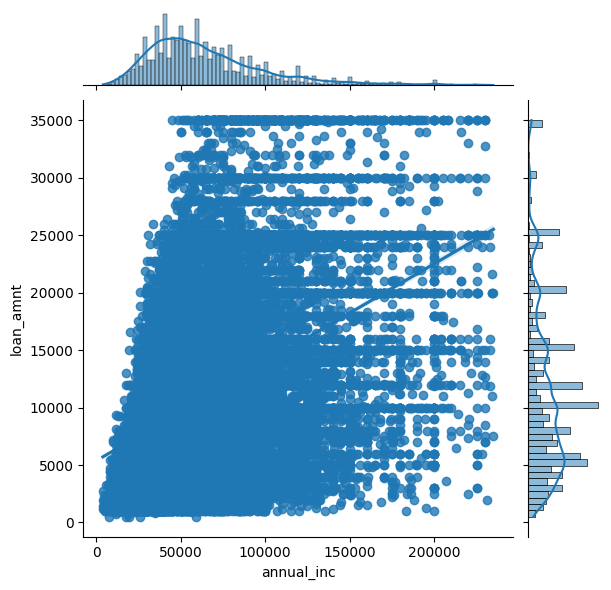

In [114]:
sns.jointplot(x=df_temp['annual_inc'], y=loan['loan_amnt'],kind="reg")
plt.show()

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

---
### loan_amnt vs grade

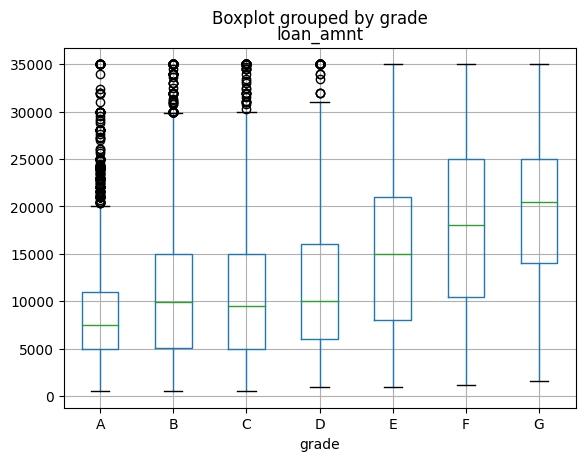

In [115]:
master_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

 -  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

---
##### annual income with grade

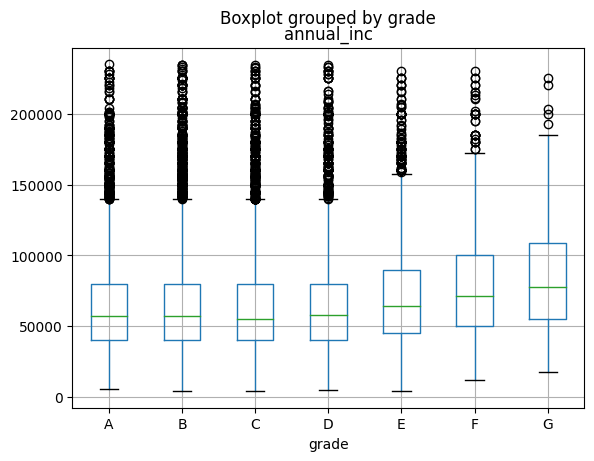

In [116]:

master_loan.loc[master_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

> ## Bivariate Analysis: Categorical Variables

      Categorical Variables are:

        1. home_ownership
        2. purpose
        3. addr_state
        4. term
        5. grade
        6. sub_grade
        7. emp_length
        8. issue_yr
        9. funded_amnt
       10. int_rate_percent
       11. annual_inc
       12. installment
       13. dti

In [117]:
# Custom Function for Dafault Plotting variables

# Function Parameters  -

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.
# xlabel_rotation      -    The degree of rotation for the x-axis ticks (values).
# legend_flag          -    Boolean flag to check if a legend is required to be their in the plot.
# legend               -    Place legend on axis subplots.

def set_plotting_variable(figure_title, xlabel, ylabel, xlabel_rotation, legend_flag, legend):

    plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

    if legend_flag == True:
        plt.legend(loc = legend)

In [118]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# y_axis                -      The series/variable to be plotted along the y-axis.

# hspace                -      The amount of height reserved for space between subplots,
#                              expressed as a fraction of the average axis height

# wspace                -      The amount of width reserved for space between subplots,
#                              expressed as a fraction of the average axis width

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_bivariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel,
                   x_axis, y_axis, hspace, wspace, xlabel_rotation):

    legend = 'best'

    plt.figure(figsize = (figsize_x, figsize_y))

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.lineplot(data = y_axis, estimator = np.median, color = 'darkblue')
    # Call Custom Function
    title = "Line Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Bar Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)

    # Subplot - 3
    plt.subplot(subplot_x, subplot_y, 3)

    sns.lineplot(data = y_axis, estimator = np.median, color = 'maroon')
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Joint Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)

    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

### home_ownership against Charged Off Percentage Rate

loan_status     Charged Off  Current  Fully Paid  Total  Charged Off Rate
home_ownership                                                           
OTHER                    18        0          78     96           18.7500
RENT                   2824      416       15573  18813           15.0109
OWN                     440       82        2507   3029           14.5262
MORTGAGE               2302      628       14448  17378           13.2466
NONE                      0        0           3      3            0.0000


loan_status  Charged Off     Current    Fully Paid         Total  \
count           5.000000    5.000000      5.000000      5.000000   
mean         1116.800000  225.200000   6521.800000   7863.800000   
std          1344.608939  283.102808   7824.397721   9432.804021   
min             0.000000    0.000000      3.000000      3.000000   
25%            18.000000    0.000000     78.000000     96.000000   
50%           440.000000   82.000000   2507.000000   3029.000000   
75% 

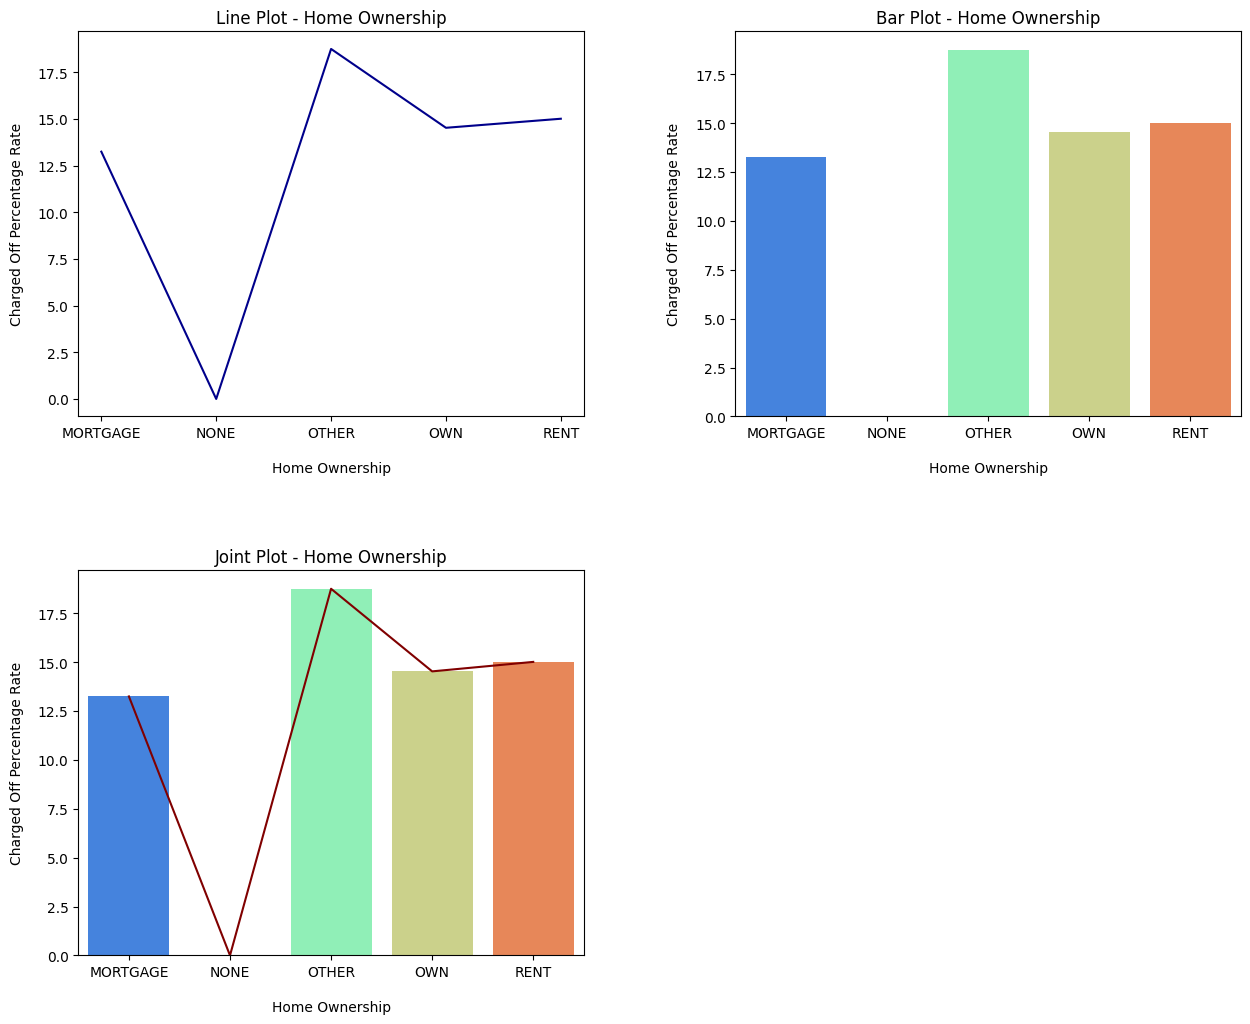

In [119]:
df = loan.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Home Ownership",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 0)

#### Charged Off Rate - Top 3 Borrower's Home Ownership:

    1. OTHER  = 18.75%
    2. RENT   = 15.01%
    3. OWN    = 14.53%

### purpose against Charged Off Percentage Rate

loan_status         Charged Off  Current  Fully Paid  Total  Charged Off Rate
purpose                                                                      
small_business              472       74        1251   1797           26.2660
renewable_energy             19        1          81    101           18.8119
educational                  55        0         268    323           17.0279
other                       629      126        3203   3958           15.8919
moving                       91        7         479    577           15.7712
house                        58       14         299    371           15.6334
medical                     106       12         568    686           15.4519
debt_consolidation         2752      580       15165  18497           14.8781
vacation                     53        6         322    381           13.9108
home_improvement            338       97        2459   2894           11.6793
credit_card                 537      102        4450   5089     

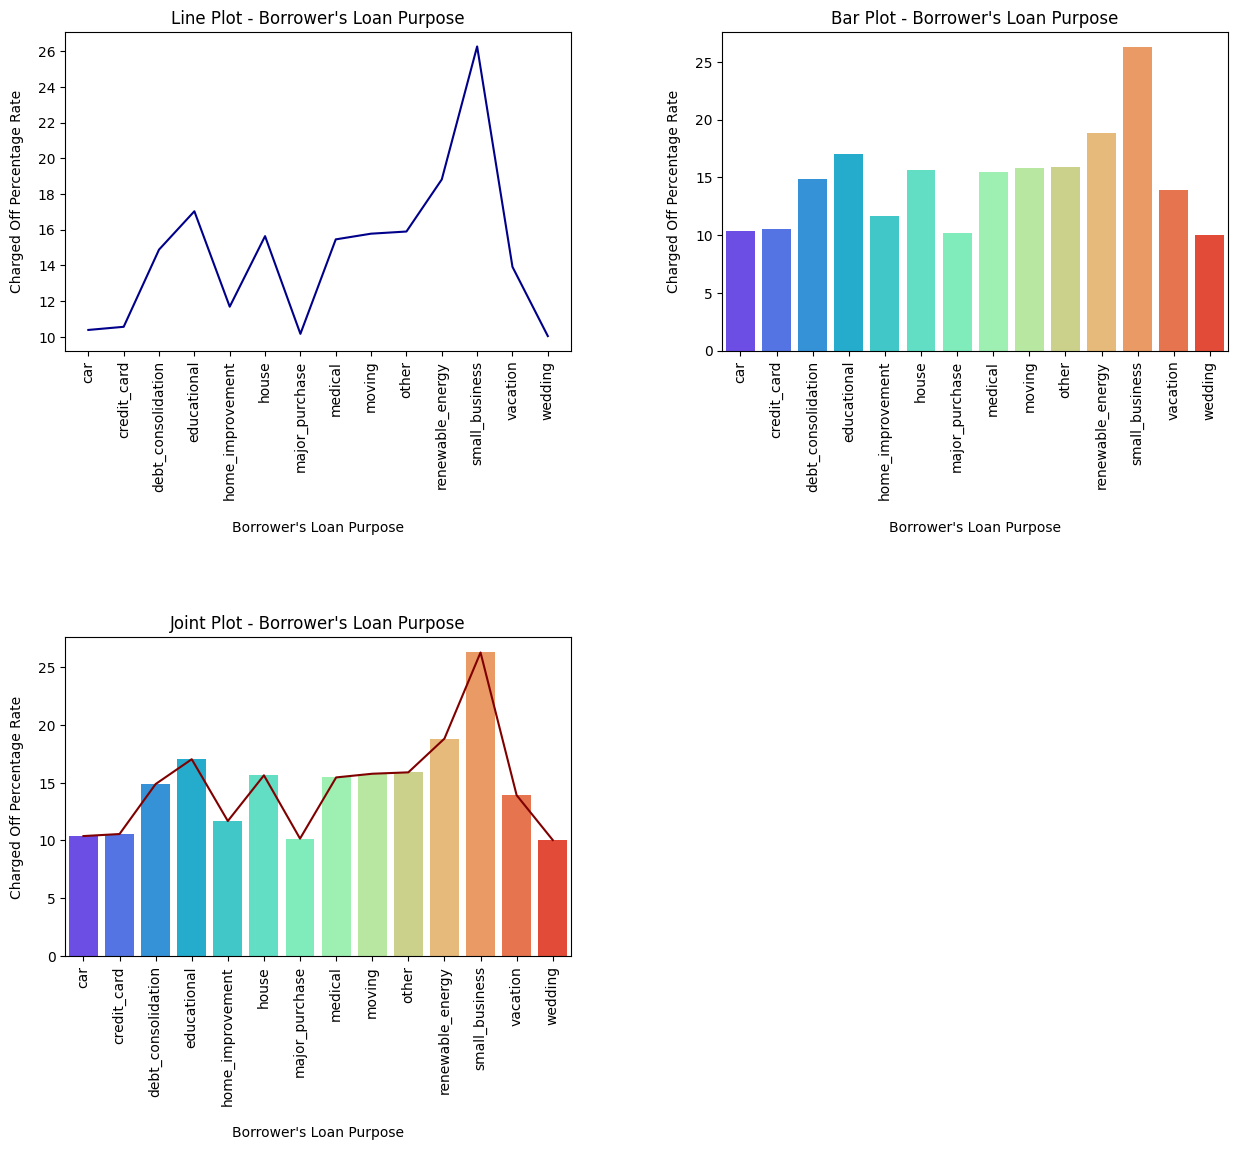

In [120]:


df = loan.pivot_table(values = 'funded_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Loan Purpose",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.9,
               wspace = 0.3,
               xlabel_rotation = 90)

#### Charged Off Rate - Top 3 Borrower's Purpose:

    1. small_business    = 26.27%
    2. renewable_energy  = 18.81%
    3. educational       = 17.03%

### addr_state against Charged Off Percentage Rate

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
addr_state                                                            
NE                     3        0           2      5           60.0000
NV                   107       17         368    492           21.7480
SD                    12        2          50     64           18.7500
AK                    14        2          63     79           17.7215
FL                   497       85        2252   2834           17.5371
MO                   114       16         551    681           16.7401
ID                     1        0           5      6           16.6667
NM                    30        5         149    184           16.3043
HI                    28        8         138    174           16.0920
CA                  1116      149        5767   7032           15.8703
OR                    71       16         364    451           15.7428
UT                    40        6         211    257           15.5642
MD    

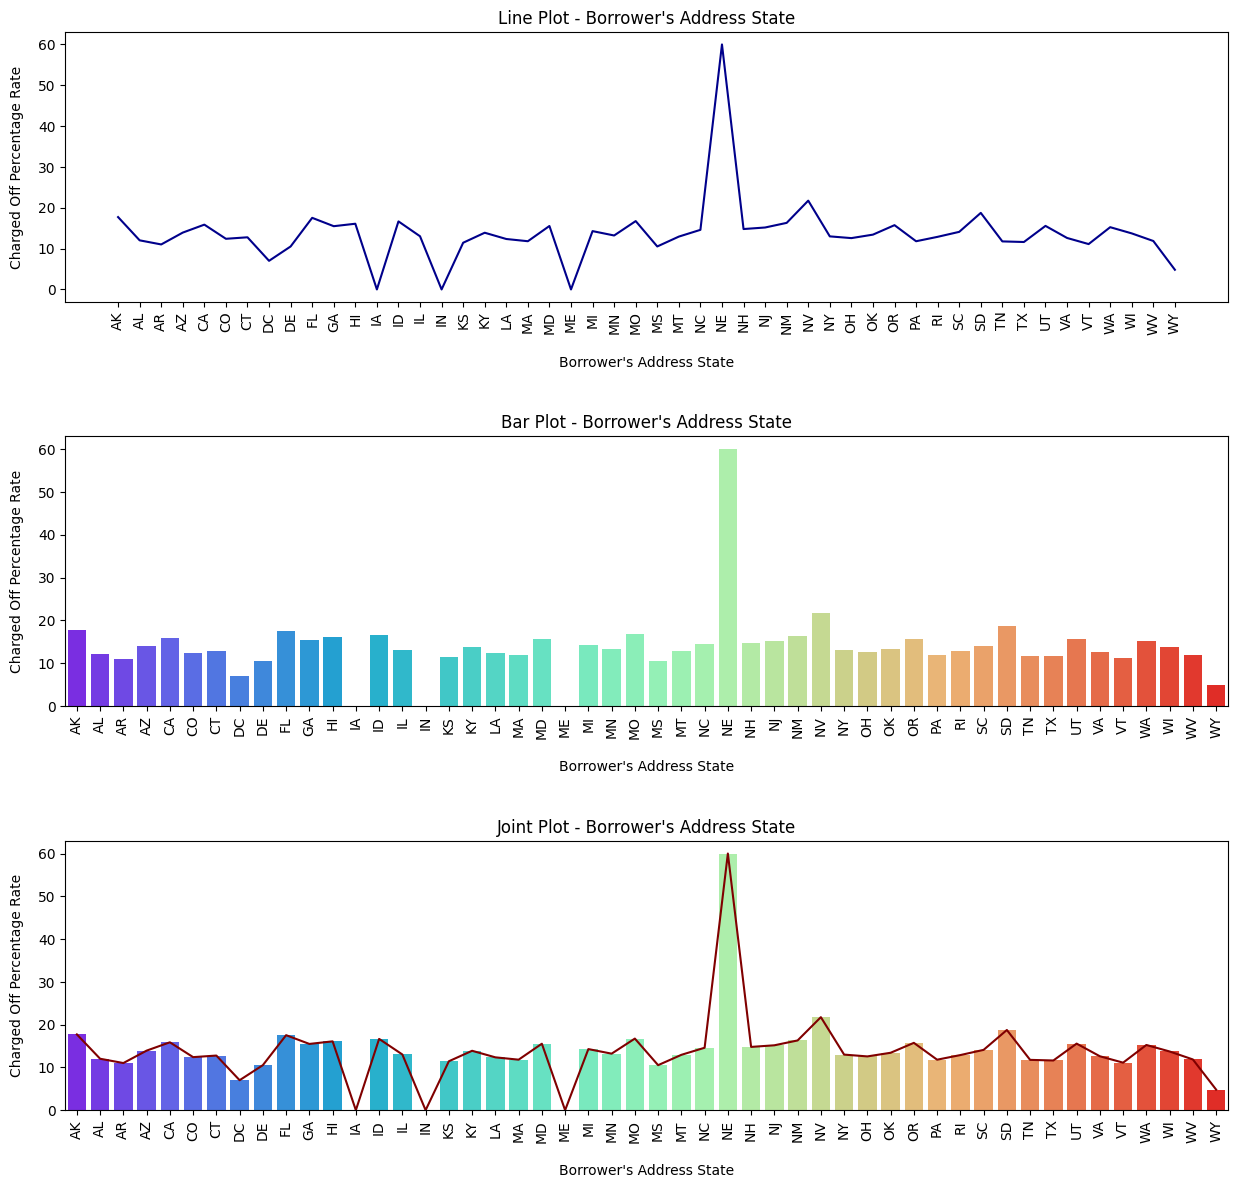

In [121]:
df_addr_state = loan.pivot_table(values = 'funded_amnt',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_addr_state['Charged Off Rate'] = 100*(round((df_addr_state['Charged Off']/df_addr_state['Total']), 6))

print(df_addr_state.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')

xdata = df_addr_state.iloc[0:-1].index
ydata = df_addr_state.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 14,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Borrower's Address State",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

##### Charged Off Rate - Top 5 Borrower's Address State:

    1. NE (Nebraska)     = 60.00%
    2. NV (Nevada)       = 21.75%
    3. SD (South Dakota) = 18.75%
    4. AK (Alaska)       = 17.72%
    5. FL (Florida)      = 17.54%
    
    *NE (Nebraska) has a total of 5 loans out of which 3 were charged-off.

### term against Charged Off Percentage Rate

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
term                                                                  
 60 months          2383     1126        6990  10499           22.6974
 36 months          3201        0       25619  28820           11.1069


loan_status  Charged Off      Current    Fully Paid         Total  \
count           2.000000     2.000000      2.000000      2.000000   
mean         2792.000000   563.000000  16304.500000  19659.500000   
std           578.413347   796.202236  13172.692227  12954.903338   
min          2383.000000     0.000000   6990.000000  10499.000000   
25%          2587.500000   281.500000  11647.250000  15079.250000   
50%          2792.000000   563.000000  16304.500000  19659.500000   
75%          2996.500000   844.500000  20961.750000  24239.750000   
max          3201.000000  1126.000000  25619.000000  28820.000000   

loan_status  Charged Off Rate  
count                2.000000  
mean                16.90215

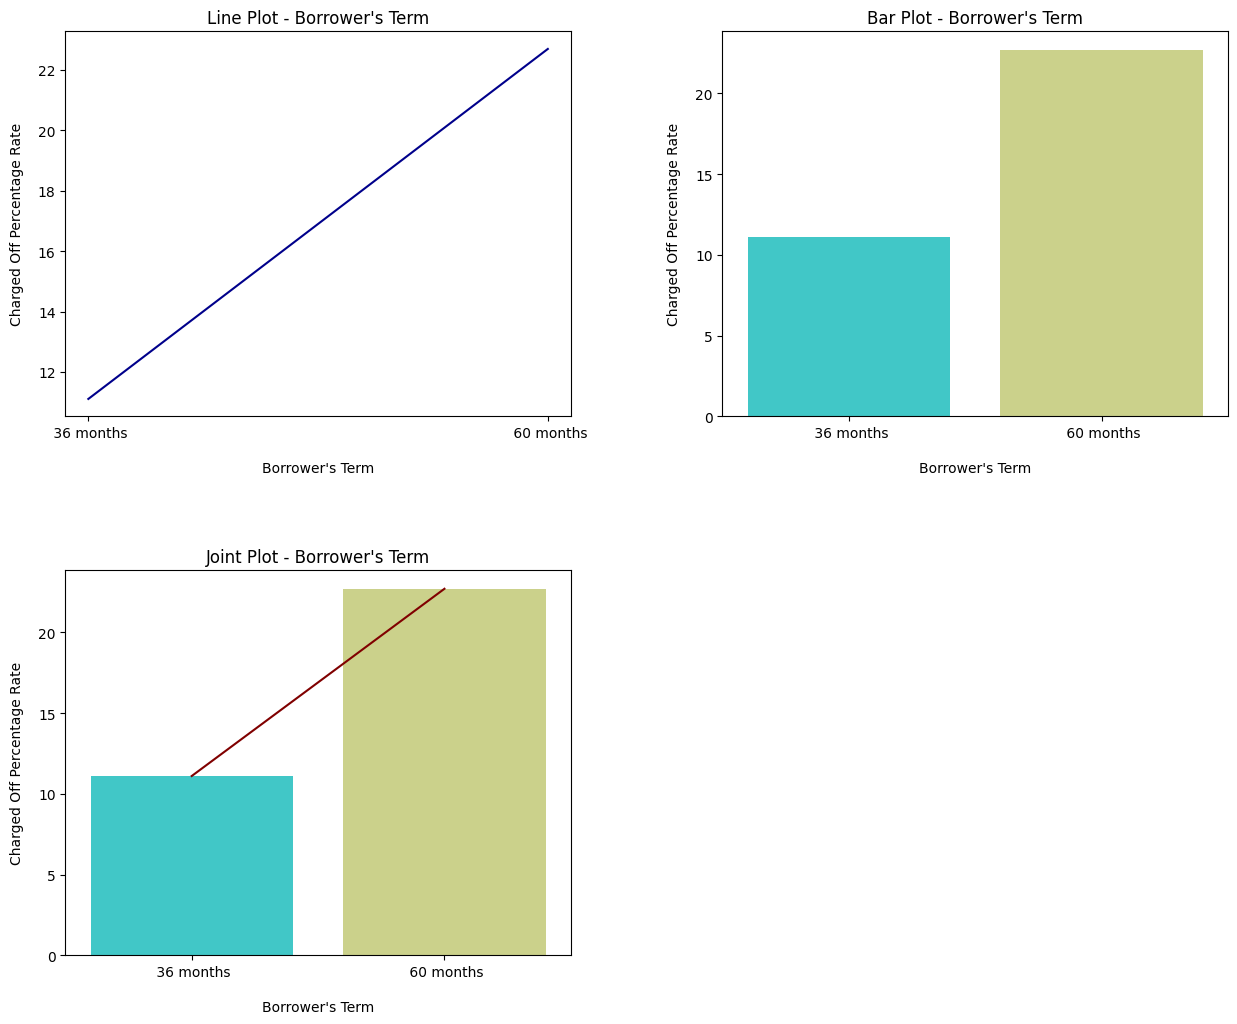

In [122]:
df = loan.pivot_table(values = 'funded_amnt',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Term",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 0)

##### Charged Off Rate - Borrower's Top Loan Term:

    1. 60 months   = 22.70%
    2. 30 months   = 11.10%

### grade against Charged Off Percentage Rate

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
grade                                                                 
G                     99       17         190    306           32.3529
F                    312       71         642   1025           30.4390
E                    704      176        1906   2786           25.2692
D                   1112      216        3916   5244           21.2052
C                   1342      262        6411   8015           16.7436
B                   1414      344       10167  11925           11.8574
A                    601       40        9377  10018            5.9992


loan_status  Charged Off     Current    Fully Paid        Total  \
count           7.000000    7.000000      7.000000      7.00000   
mean          797.714286  160.857143   4658.428571   5617.00000   
std           507.679267  122.757795   4080.571809   4515.84145   
min            99.000000   17.000000    190.000000    306.00000   
25%           456.500000

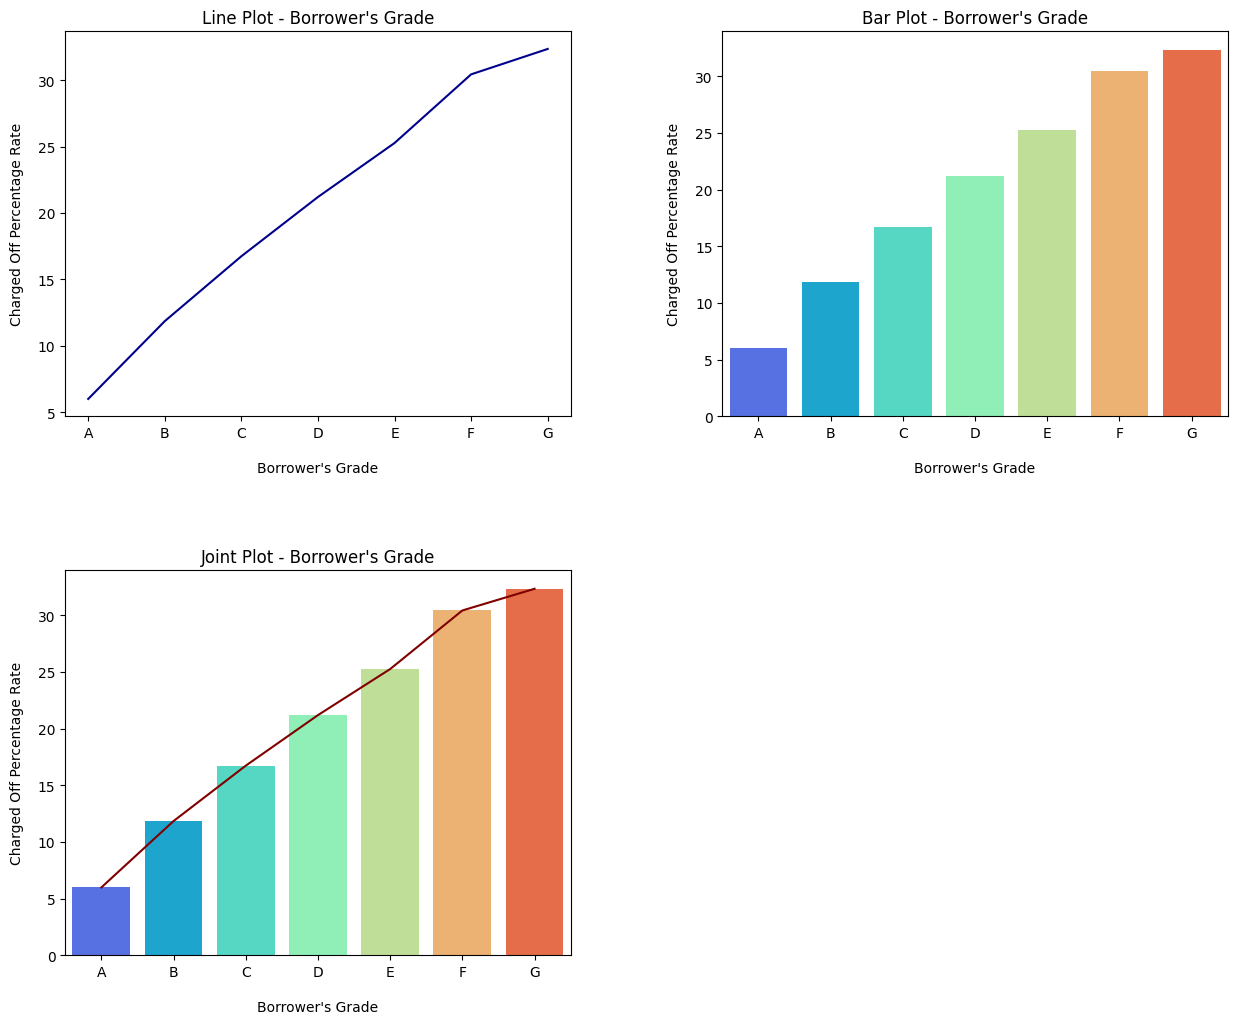

In [123]:
df = loan.pivot_table(values = 'funded_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Grade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 0)

##### Charged Off Rate - Grade:

    As the Grade increases, Charged Off Rate increases. Top Order:
        
        1. G
        2. F
        3. E
        4. D
        5. C
        6. B
        7. A

### sub_grade against Charged Off Percentage Rate

loan_status      Charged Off  Current  Fully Paid  Total  Charged Off Rate
grade sub_grade                                                           
G     G5                  10        1          18     29           34.4828
      G4                  12        2          39     53           22.6415
      G3                  19        3          25     47           40.4255
      G2                  27        1          47     75           36.0000
      G1                  31       10          61    102           30.3922
F     F5                  53        4          55    112           47.3214
      F4                  52       17          96    165           31.5152
      F3                  50       11         118    179           27.9330
      F2                  69       16         162    247           27.9352
      F1                  88       23         211    322           27.3292
E     E5                 106       29         264    399           26.5664
      E4                 

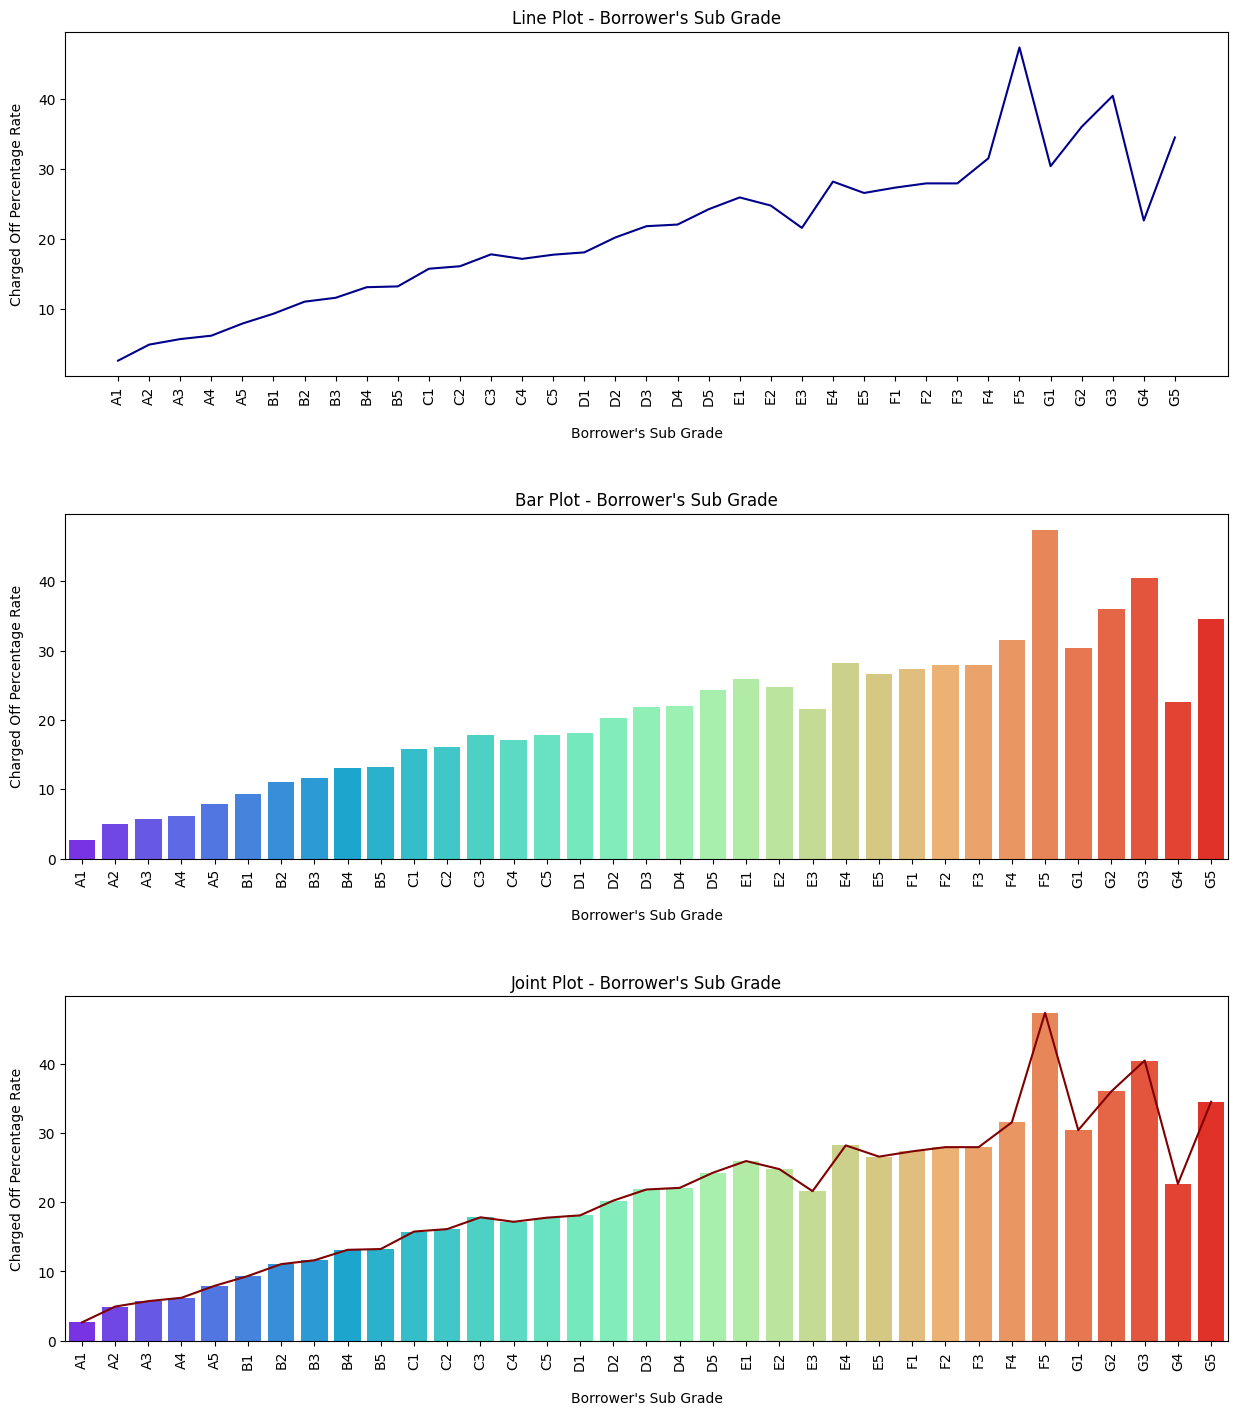

In [124]:
df = loan.pivot_table(values = 'funded_amnt',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

df_sub_grade = loan.pivot_table(values = 'funded_amnt',
                                index = ['grade', 'sub_grade'],
                                columns = 'loan_status',
                                aggfunc = np.count_nonzero,
                                fill_value = 0,
                                margins = True,
                                margins_name = 'Total')

df_sub_grade['Charged Off Rate'] = 100*(round((df_sub_grade['Charged Off']/df_sub_grade['Total']), 6))

print(df_sub_grade.iloc[0:-1].sort_values(by = ['grade', 'sub_grade', 'Charged Off Rate'], ascending = False))
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 17,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Borrower's Sub Grade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 90)

##### Charged Off Rate - Sub Grade:

    As the Grade and the Sub Grades increases, Charged Off Rate increases. Top Order:
        
        1. G
        2. F
        3. E
        4. D
        5. C
        6. B
        7. A

### emp_length against Charged Off Percentage Rate

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
emp_length                                                            
10.0                1316      386        7038   8740           15.0572
7.0                  262       62        1435   1759           14.8948
1.0                  455       69        2689   3213           14.1612
5.0                  456       87        2712   3255           14.0092
0.0                  635       74        3844   4553           13.9468
8.0                  203       43        1216   1462           13.8851
6.0                  305       58        1846   2209           13.8072
3.0                  551       82        3426   4059           13.5748
4.0                  456       94        2860   3410           13.3724
2.0                  561       97        3684   4342           12.9203
9.0                  157       32        1058   1247           12.5902


loan_status  Charged Off     Current   Fully Paid        Total  \
count    

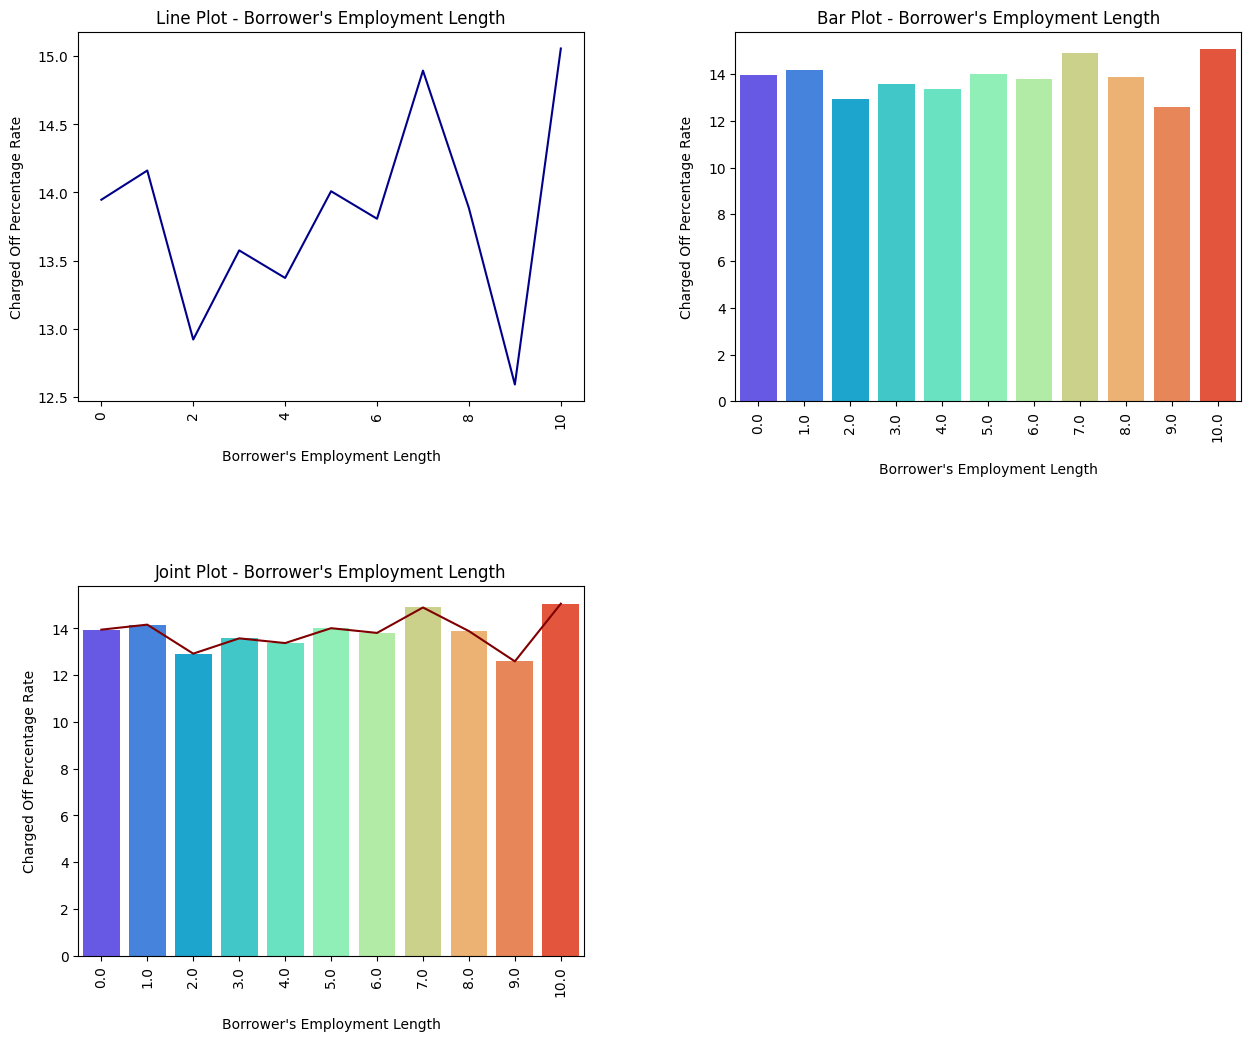

In [125]:
df = loan.pivot_table(values = 'funded_amnt',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Employment Length",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

##### Charged Off Rate - Employment Length:

Here 10 years means >10 years experience and 0 year mean <1 year experience. Now >10 years doesn't give a definite year. Any values (11, 12, 13, ..., 20, 21, etc.) are possible and so we can definitely expect a high spike in that range as the spike is the combined rate of all charged off percentages more than 10. However, <1 year experience depicts only 1 value that is zero year experience or one who haven't completed 1 year. It can't be negative.

#####    So, Top 3 employment length belonging to Charged Off category :

        1.  1 year
        2.  0 year (< 1 year)
        3. 10 Years (> 10 years)

### issue_yr against Charged Off Percentage Rate

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
issue_yr                                                              
2007                  43        0         204    247           17.4089
2008                 246        0        1306   1552           15.8505
2011                3239     1126       17079  21444           15.1045
2010                1466        0        9947  11413           12.8450
2009                 590        0        4073   4663           12.6528


loan_status  Charged Off      Current    Fully Paid         Total  \
count           5.000000     5.000000      5.000000      5.000000   
mean         1116.800000   225.200000   6521.800000   7863.800000   
std          1305.232814   503.562509   7005.395328   8733.816961   
min            43.000000     0.000000    204.000000    247.000000   
25%           246.000000     0.000000   1306.000000   1552.000000   
50%           590.000000     0.000000   4073.000000   4663.000000   
75%          1466.

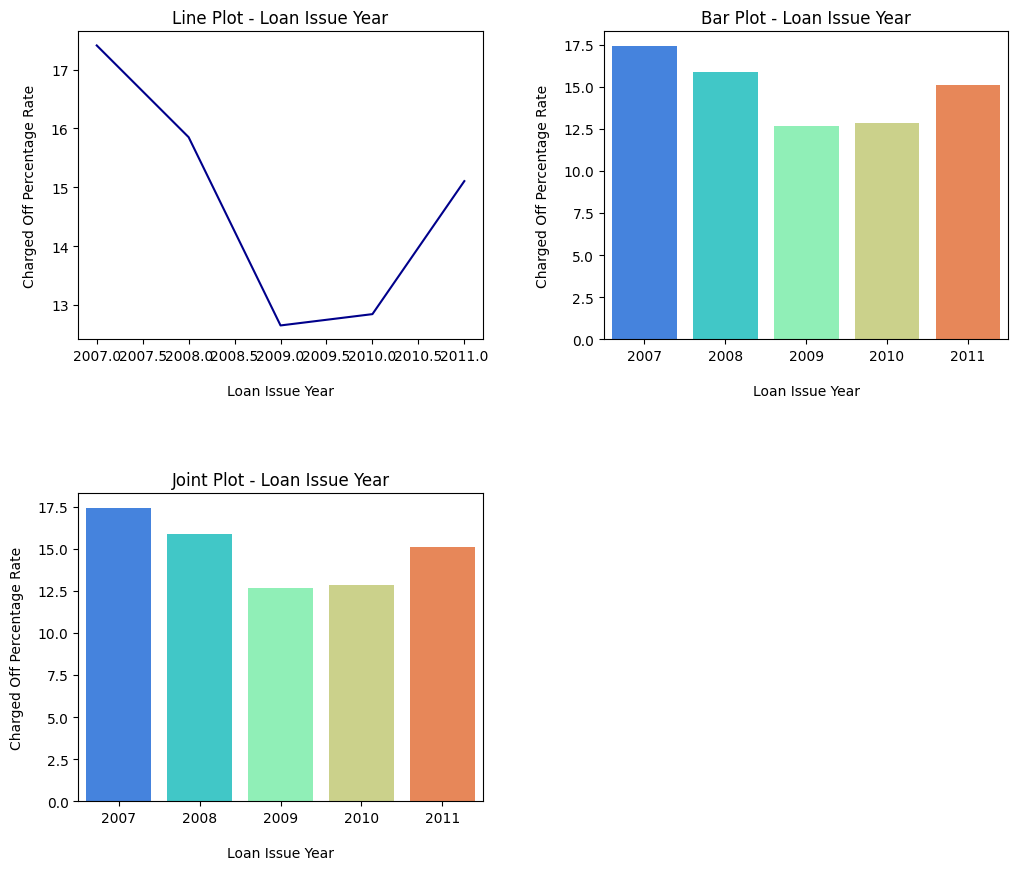

In [126]:
df = loan.pivot_table(values = 'funded_amnt',
                      index = 'issue_yr',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 12,
               figsize_y = 10,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Loan Issue Year",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 0)

Looking into above plots, It can be said that the charged off percentage reduced from year 2007 to 2009 and then gradually increased from 2009 to 2011.It is not adding any substantial inference to the Charged off Rate.

### funded_amnt against Charged Off Percentage Rate

loan_status        Charged Off  Current  Fully Paid  Total  Charged Off Rate
funded_amnt_range                                                           
28000-35000                209      104         705   1018           20.5305
21000-28000                465      180        1933   2578           18.0372
14000-21000               1171      354        5735   7260           16.1295
7000-14000                1823      326       11681  13830           13.1815
0-7000                    1916      162       12555  14633           13.0937


loan_status  Charged Off     Current    Fully Paid         Total  \
count           5.000000    5.000000      5.000000      5.000000   
mean         1116.800000  225.200000   6521.800000   7863.800000   
std           772.871399  108.945858   5443.531684   6256.733269   
min           209.000000  104.000000    705.000000   1018.000000   
25%           465.000000  162.000000   1933.000000   2578.000000   
50%          1171.000000  180.000000   5735.000000 

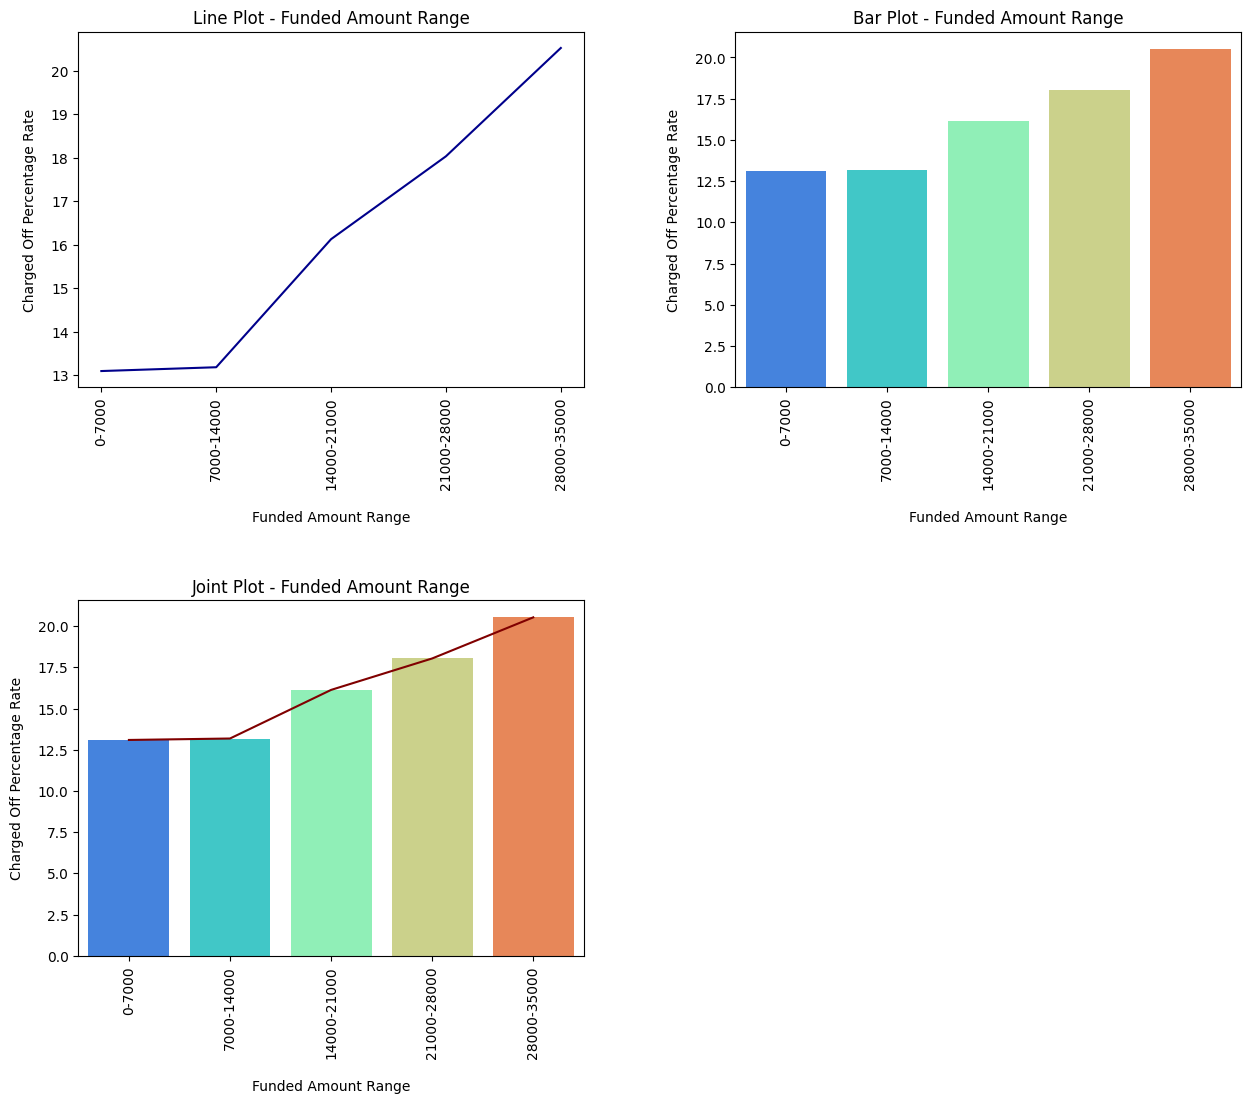

In [127]:
bins = [0, 7000, 14000, 21000, 28000, 35000]

rng = ['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000-35000']

loan['funded_amnt_range'] = pd.cut(loan.funded_amnt, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'funded_amnt_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Funded Amount Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.6,
               wspace = 0.3,
               xlabel_rotation = 90)

##### Charged Off Rate - Top 3 Loan Funded Amount Range:

    1. 28000-35000   = 20.53%
    2. 21000-28000   = 18.04%
    3. 14000-21000   = 16.13%

##### Apparently, as the Loan or Funded Amount increases, Charge Off Rate Increases

### int_rate_percent against Charged Off Percentage Rate

loan_status           Charged Off  Current  Fully Paid  Total  \
int_rate_percent_rng                                            
20-25                         290      100         452    842   
15-20                        1775      424        5350   7549   
10-15                        2694      525       15404  18623   
5-10                          825       77       11403  12305   

loan_status           Charged Off Rate  
int_rate_percent_rng                    
20-25                          34.4418  
15-20                          23.5130  
10-15                          14.4660  
5-10                            6.7046  


loan_status  Charged Off     Current    Fully Paid         Total  \
count           4.000000    4.000000      4.000000      4.000000   
mean         1396.000000  281.500000   8152.250000   9829.750000   
std          1061.087807  226.834007   6590.440267   7515.086576   
min           290.000000   77.000000    452.000000    842.000000   
25%           691.250

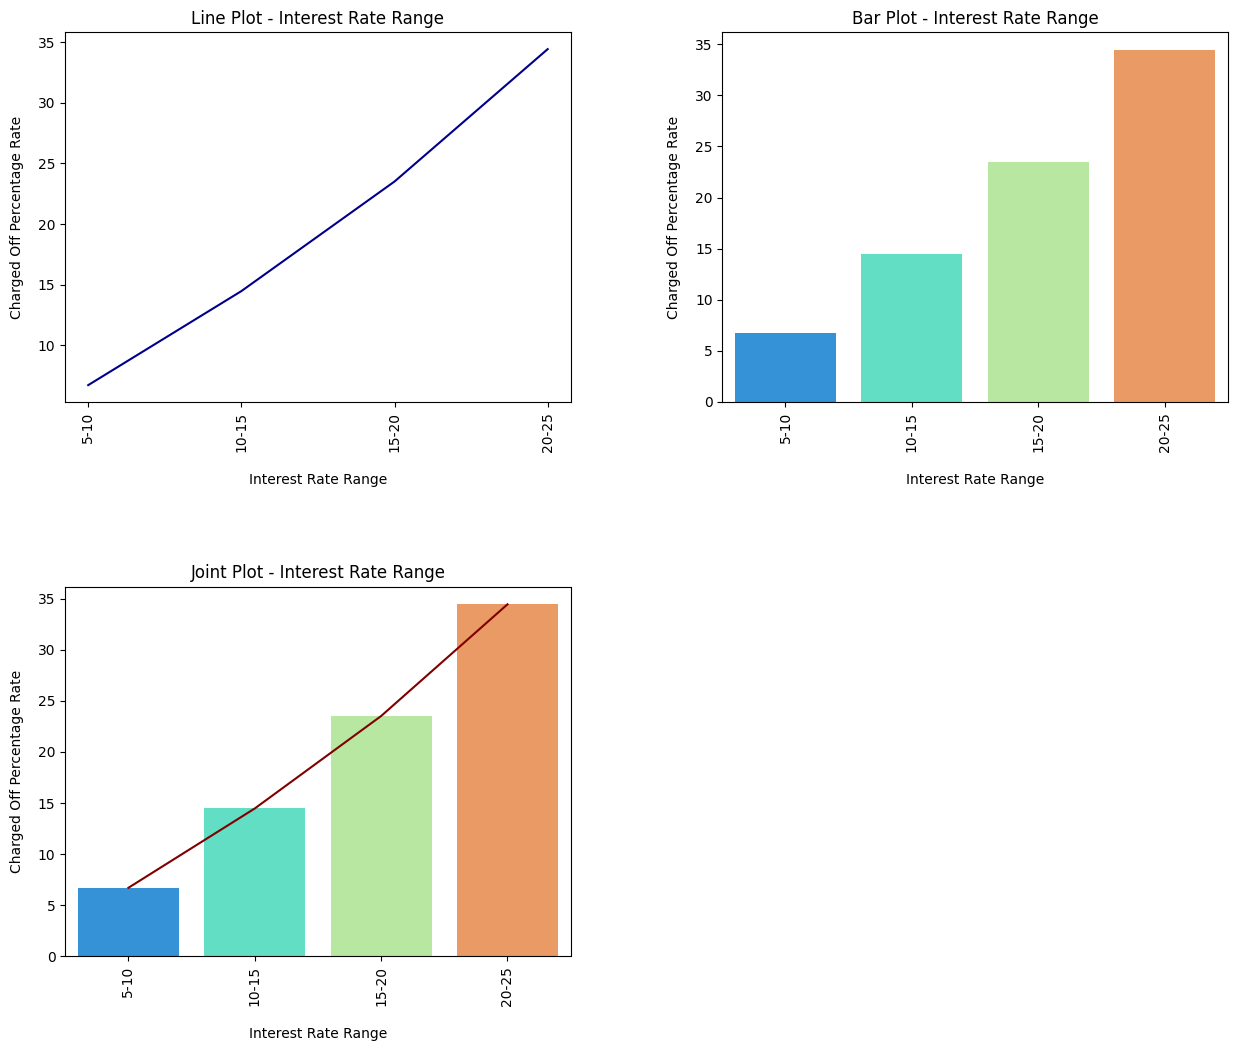

In [128]:
bins = [5, 10, 15, 20, 25]

rng = ['5-10', '10-15', '15-20', '20-25']

loan['int_rate_percent_rng'] = pd.cut(loan.int_rate, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'int_rate_percent_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Interest Rate Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

##### Charged Off Rate - Top 2 Interest Rate Range:

    1. 20-25   = 34.44%
    2. 15-10   = 23.51%
    3. 10-15   = 14.46%

##### As the Interest Rate increases, Charge Off Rate Increases

### annual_inc against Charged Off Percentage Rate

loan_status     Charged Off  Current  Fully Paid  Total  Charged Off Rate
annual_inc_rng                                                           
0-20000                 237        9         943   1189           19.9327
20000-40000            1514      170        7004   8688           17.4263
40000-60000            1729      345        9534  11608           14.8949
60000-80000            1024      240        6597   7861           13.0263
80000-100000            531      170        3983   4684           11.3365
100000-120000           244       81        2084   2409           10.1287
120000-140000           137       39        1081   1257           10.8990
140000-160000            84       37         626    747           11.2450
160000-180000            36       23         348    407            8.8452
180000-200000            31       10         240    281           11.0320
200000-220000            11        2         104    117            9.4017
220000-240000             6        0  

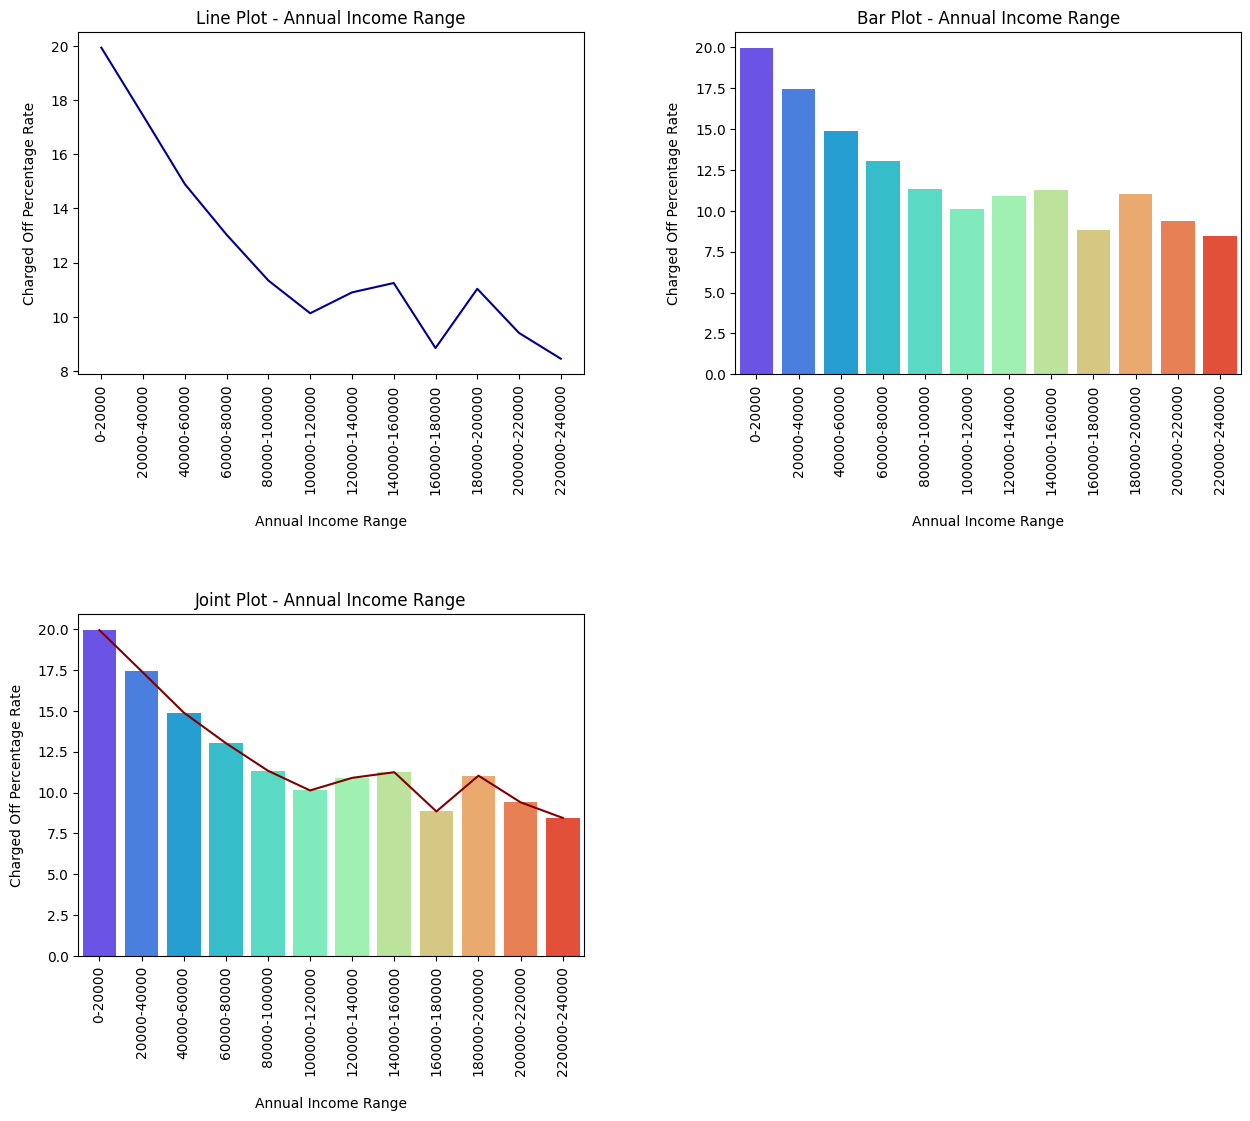

In [129]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]

rng = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']

loan['annual_inc_rng'] = pd.cut(loan.annual_inc, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'annual_inc_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Annual Income Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.7,
               wspace = 0.3,
               xlabel_rotation = 90)

##### Charged Off Rate - Top 3 Annual Income Range:

    1. 0-20000       = 19.93%
    2. 20000-40000   = 17.43%
    3. 40000-60000   = 14.90%

##### So, as the Anual Income decreases, Charge Off Rate Increases

### installment against Charged Off Percentage Rate

loan_status      Charged Off  Current  Fully Paid  Total  Charged Off Rate
installment_rng                                                           
0-200                   1808      207       11214  13229           13.6669
200-400                 2056      435       12598  15089           13.6258
400-600                 1036      310        5448   6794           15.2487
600-800                  423      132        2151   2706           15.6319
800-1000                 238       42        1013   1293           18.4068
1000-1200                 15        0         142    157            9.5541
1200-1400                  8        0          43     51           15.6863


loan_status  Charged Off     Current    Fully Paid        Total  \
count           7.000000    7.000000      7.000000      7.00000   
mean          797.714286  160.857143   4658.428571   5617.00000   
std           851.539922  166.451623   5290.122710   6285.02864   
min             8.000000    0.000000     43.000000     

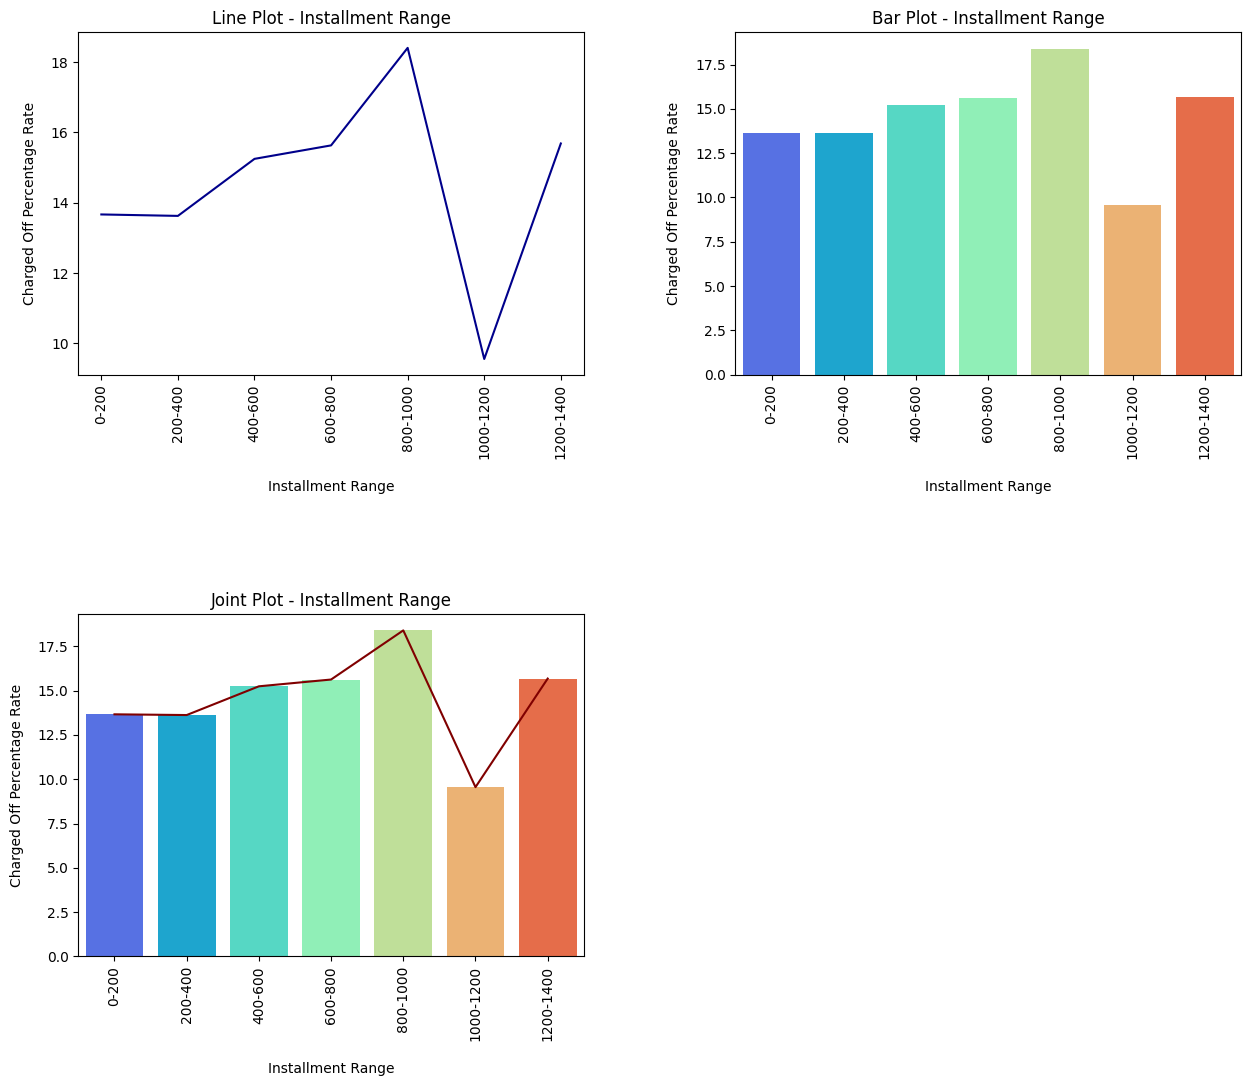

In [130]:
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]

rng = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400']

loan['installment_rng'] = pd.cut(loan.installment, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'installment_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Installment Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.7,
               wspace = 0.3,
               xlabel_rotation = 90)

    With the Custom range defined, we can infer that:

##### As the installment increases, Charged Off Rate increases and drops drastically at 1000-1200 installments range.

### dti against Charged Off Percentage Rate

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
dti_rng                                                               
0-5                  580       90        4157   4827           12.0157
5-10                 996      191        6749   7936           12.5504
10-15               1392      268        8165   9825           14.1679
15-20               1385      282        7400   9067           15.2752
20-25               1116      237        5455   6808           16.3925
25-30                 87       53         535    675           12.8889


loan_status  Charged Off     Current   Fully Paid        Total  \
count           6.000000    6.000000     6.000000     6.000000   
mean          926.000000  186.833333  5410.166667  6523.000000   
std           508.423839   95.359146  2781.391912  3362.393612   
min            87.000000   53.000000   535.000000   675.000000   
25%           684.000000  115.250000  4481.500000  5322.250000   
50%          1056.000000  214.0000

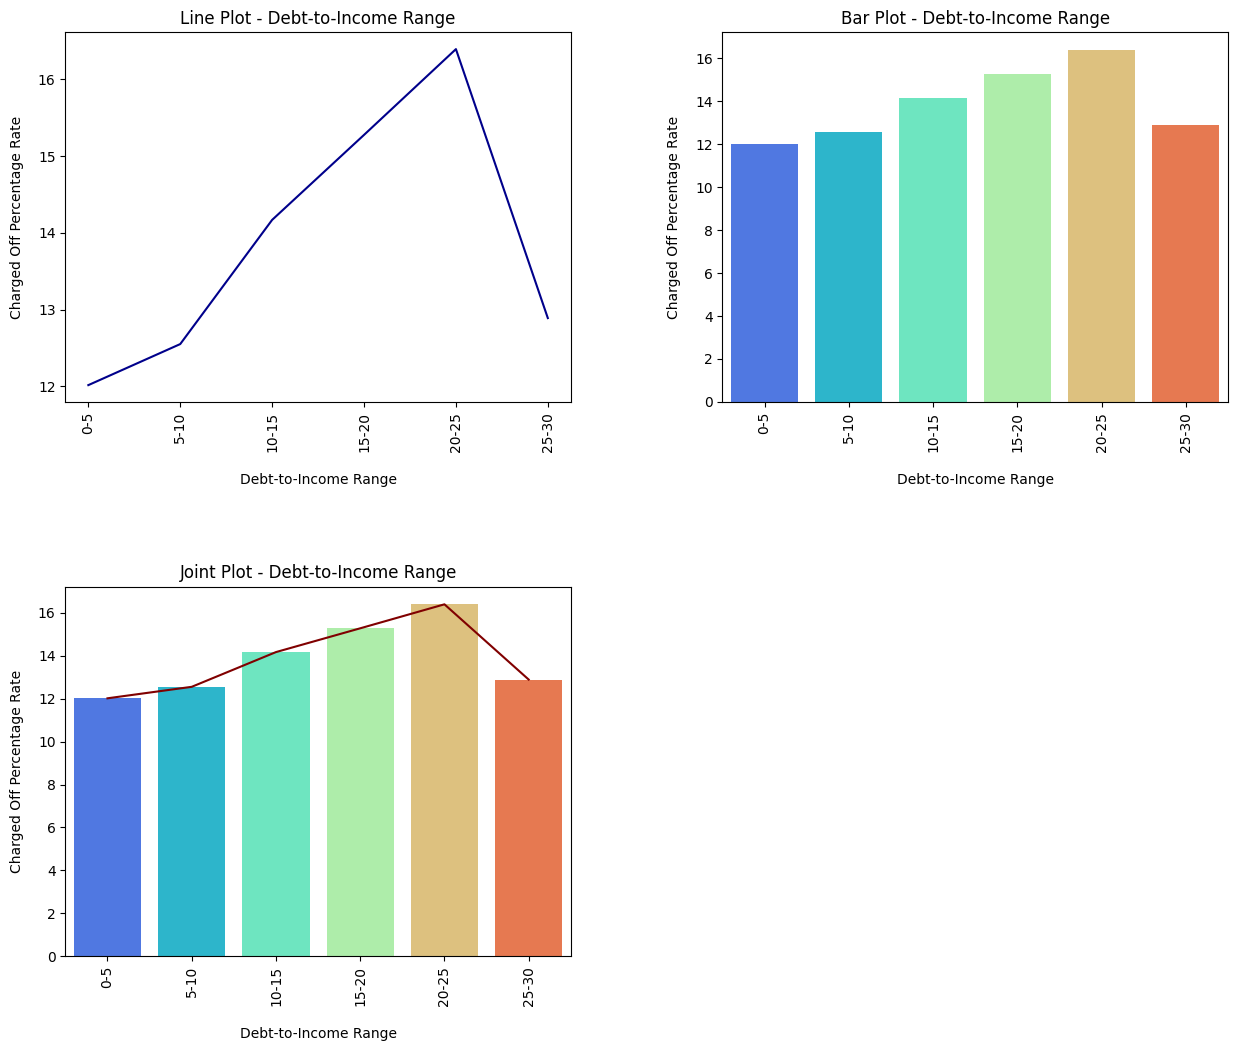

In [131]:
bins = [0, 5, 10, 15, 20, 25, 30]

rng = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

loan['dti_rng'] = pd.cut(loan.dti, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'dti_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Debt-to-Income Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

##### So, as dti (Debt-to-Income) value increases, Charged Off Rate increases

Exception is in range 25-30. This is because the population data in this range is not high.

>### Bivariate Analysis: Continuous Variables

In [132]:
# Correlation of loan_status = Charged Off
charged_off_df = loan[loan.loan_status == 'Charged Off'].corr().drop(labels = {'out_prncp', 'out_prncp_inv'})

charged_off_df.dropna(axis = 1, how = 'all', inplace = True)

charged_off_df

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_yr
loan_amnt,1.000000,0.979281,0.349623,0.926070,0.191565,0.453498,0.068173,-0.029205,0.006245,0.013929,0.178795,-0.046607,0.044055,0.276266,0.680674,0.642960,-0.026830,0.119595
funded_amnt,0.979281,1.000000,0.352654,0.953866,0.195375,0.445298,0.065022,-0.026946,0.006283,0.016427,0.175149,-0.051207,0.048082,0.267066,0.697994,0.660251,-0.031377,0.132686
int_rate,0.349623,0.352654,1.000000,0.326526,0.041467,0.166791,0.041724,0.119349,0.060286,-0.019920,0.034464,0.080203,0.380622,-0.015009,0.263813,0.276245,0.075957,0.179229
installment,0.926070,0.953866,0.326526,1.000000,0.162207,0.452031,0.047803,-0.012404,0.016441,-0.006800,0.172583,-0.039643,0.076206,0.242238,0.666266,0.615978,-0.023250,0.030197
emp_length,0.191565,0.195375,0.041467,0.162207,1.000000,0.184950,0.060952,0.011496,0.008035,0.038483,0.096276,0.061188,0.038502,0.182674,0.162011,0.167252,0.053873,0.120595
annual_inc,0.453498,0.445298,0.166791,0.452031,0.184950,1.000000,-0.055889,0.029778,0.062720,-0.017834,0.276616,0.001266,0.094358,0.374310,0.349989,0.328071,0.007876,-0.004733
dti,0.068173,0.065022,0.041724,0.047803,0.060952,-0.055889,1.000000,-0.068889,-0.028906,0.072286,0.302067,0.008433,0.229008,0.277123,0.046310,0.051617,0.018593,0.094825
delinq_2yrs,-0.029205,-0.026946,0.119349,-0.012404,0.011496,0.029778,-0.068889,1.000000,-0.012204,-0.583238,-0.017747,-0.000952,-0.099752,0.061109,-0.015859,-0.022740,0.002797,0.012444
inq_last_6mths,0.006245,0.006283,0.060286,0.016441,0.008035,0.062720,-0.028906,-0.012204,1.000000,-0.003192,0.078819,0.014739,-0.134666,0.102593,-0.043329,-0.054369,0.008924,-0.085660
mths_since_last_delinq,0.013929,0.016427,-0.019920,-0.006800,0.038483,-0.017834,0.072286,-0.583238,-0.003192,1.000000,0.054959,0.093441,0.128304,0.004361,0.031537,0.076230,0.056205,0.117899


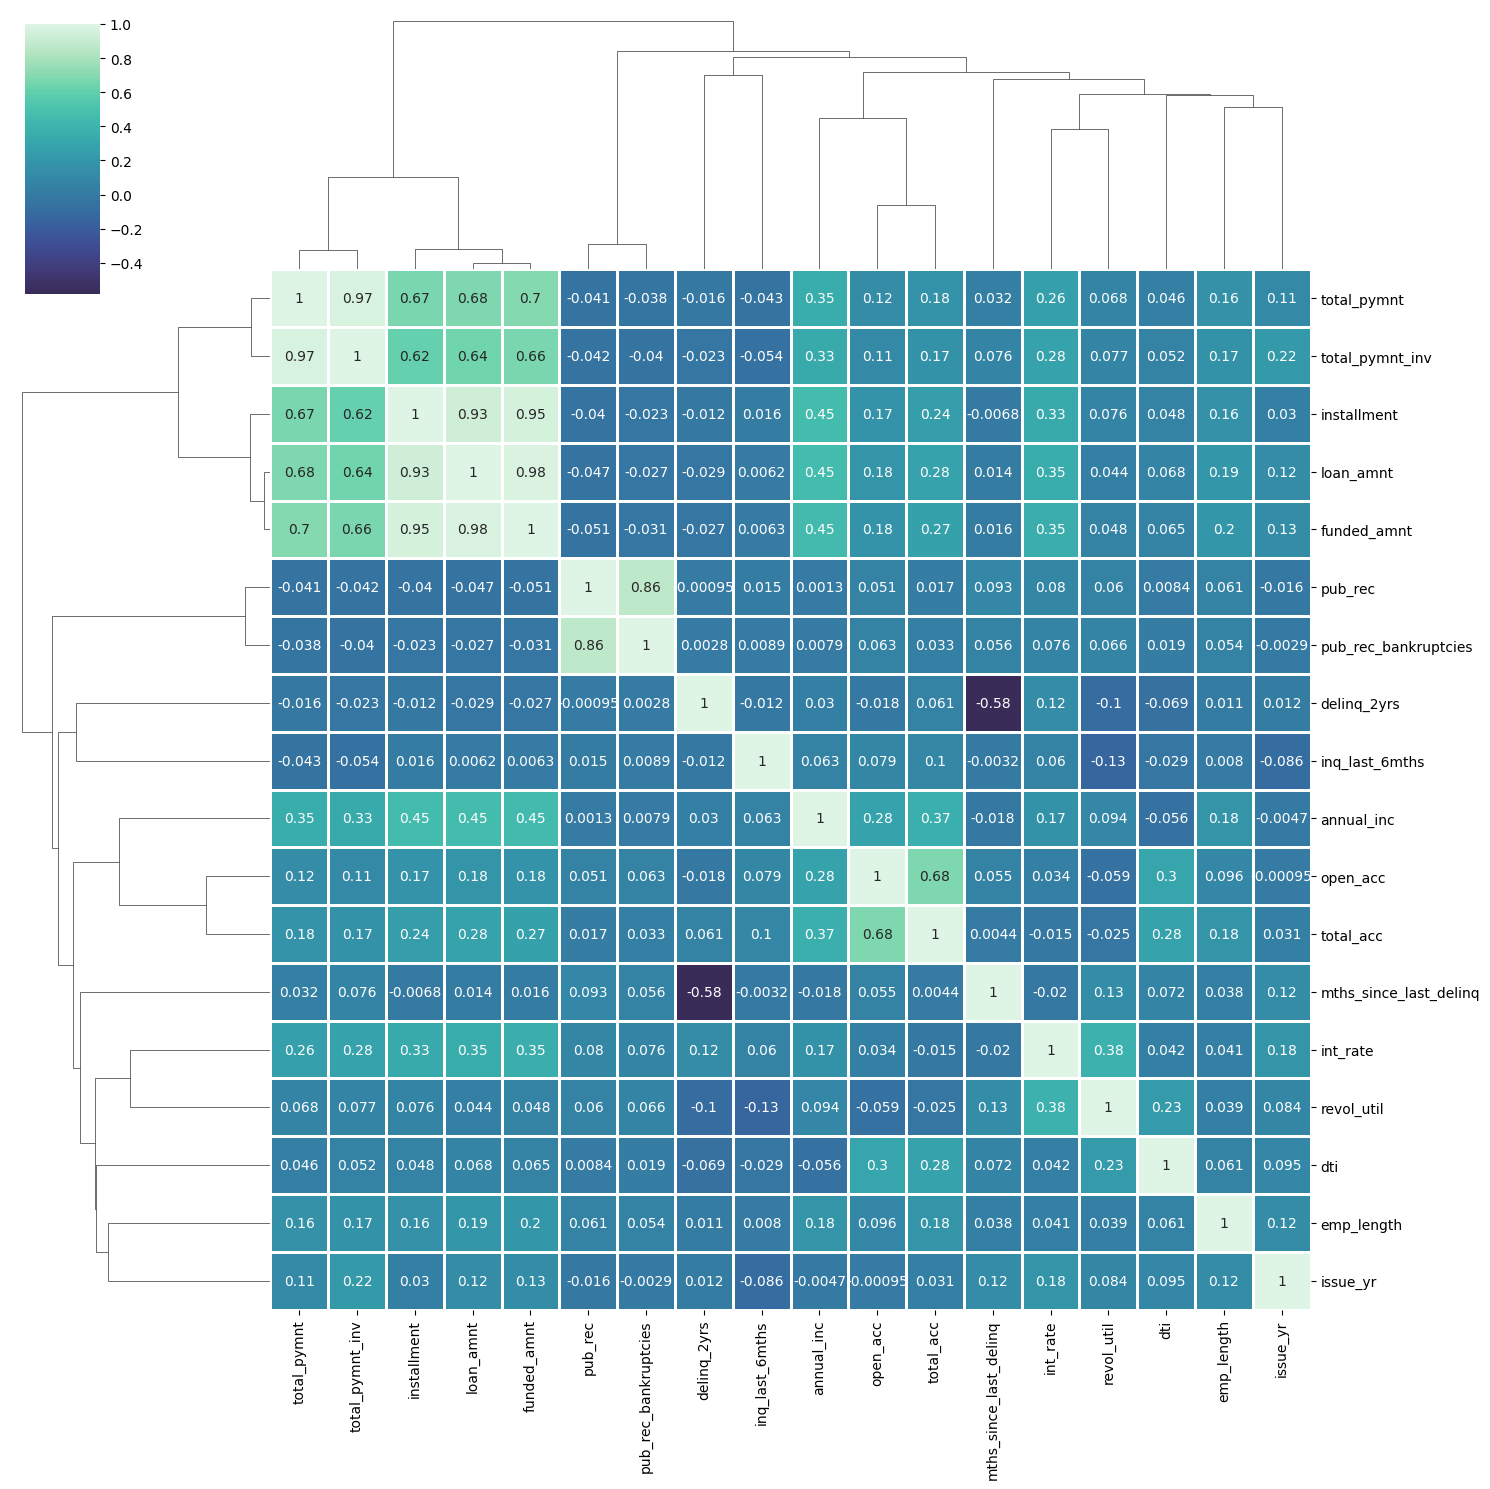

In [133]:
# Cluster Map

kwargs = {'annot': True}

sns.clustermap(charged_off_df, center = 0, cmap = 'mako', linewidths = 0.75, figsize = (15, 15), **kwargs)
plt.show()

#### From the above Correlation metric, we can infer:

1. installment, funded_amnt, loan_amnt and funded_amnt_inv are highly correlated (positive) to each other. They form a cluster.

3. int_rate_percent is negatively correlated to total_acc.

## Conclusion:

#### Major variables to consider for loan prediction:

        1. Loan Purpose
        2. Employment Length
        3. Interest Rate
        4. Annual Income
        5. Grade & Sub-grade
        6. Term
        7. Address State
        
### More Insights -

### Loan Purpose:
##### Charged Off Rate is high for loan purpose:

        1. small_business    = 26.27%
        2. renewable_energy  = 18.81%
        3. educational       = 17.03%
        

### Employment Length:
##### Charged Off Rate is high for employment length:
        
        1.  0 year (< 1 year)
        2.  1 year
##### We see that the Charged Off rate increases for peopple with less employment length.

### Interest Rate:
##### Charged Off Rate is high  for interest rate:
        
        1. 20-25   = 34.44%
        2. 15-20   = 23.51%
###### As the Interest Rate increases, Charge Off Rate Increases


### Annual Income:
##### Charged Off Rate is high for Annual Income:
        
        1. 0-20000       = 19.93%
        2. 20000-40000   = 17.43%
        3. 40000-60000   = 14.90%
##### So, as the Anual Income decreases, Charge Off Rate Increases


### Grade & Sub-grade:
##### Most of the Charged off applicants belong to Grade B, C and D.
##### Of the Grade B, C and D, most of the Charged off applicants belong to Sub Grades:
        
        1. Grade B => B3, B5, B4
        2. Grade C => C3, C4, C5
        3. Grade D => D3, D4, D5

##### Also as the Grade increases, Charged Off Rate increases. Top Order:
        
        1. G
        2. F
        3. E
        4. D
        5. C
        6. B
        7. A


### Term:
##### Charge Off Rate increases as the Term increases.


### Address State:
##### Charged Off Rate is high for Address State:
        
        1. NE (Nebraska)     = 60.00%
        2. NV (Nevada)       = 21.75%
        3. SD (South Dakota) = 18.75%
        4. AK (Alaska)       = 17.72%
        5. FL (Florida)      = 17.54%

        *NE (Nebraska) has a total of 5 loans out of which 3 were charged-off.